In [56]:
%matplotlib notebook
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import pickle
import random
from ShapePipe.shapepipe.pipeline import file_io
import glob
import shutil
import galsim.hsm as hsm
from galsim import Image

In [57]:
CFIS_data = True

if CFIS_data:
    raw_path_PSFs = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/cfis/PSFs/'
    raw_path_stars = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/cfis/stars/'
    raw_path_badpix = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/cfis/badpixs/'

    seq_PSFs = '-*-38PSFs.npy'
    seq_stars = '-*-38stars.npy'
    seq_badpixs = '-*-38badpix.npy'
    
elif not CFIS_data:
    test_path_PSFs = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/PSFs/'
    test_path_stars = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/stars/'
    test_path_badpix = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/badpix/'
    
    test9_path_PSFs = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-9/PSFs/'
    test9_path_stars = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-9/stars/'
    test9_path_badpix = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-9/badpix/'
    
    
    seq_PSFs = '-38-*PSFs.npy'
    seq_stars = '-38-*stars.npy'
    seq_badpixs = '-38-*badpix.npy'
    

    raw_path_PSFs = test9_path_PSFs
    raw_path_stars = test9_path_stars
    raw_path_badpix = test9_path_badpix  


# Extract all the files from the chose CCD
paths_PSFs = glob.glob(raw_path_PSFs + seq_PSFs)
paths_stars = glob.glob(raw_path_stars + seq_stars)
paths_badpixs = glob.glob(raw_path_badpix + seq_badpixs)

paths_PSFs.sort()
paths_stars.sort()
paths_badpixs.sort()


In [58]:
catalog_nb = 2
PSF = np.load(paths_PSFs[catalog_nb])
star = np.load(paths_stars[catalog_nb])
try:
    bad_pixs = np.load(paths_badpixs[catalog_nb])
except:
    a=1

In [43]:
PSF.shape


(68, 51, 51)

In [59]:
PSF_moms = [hsm.FindAdaptiveMom(Image(my_psf), strict=False) for my_psf in PSF]
PSF_shapes = np.array([[moms.observed_shape.g1,
                         moms.observed_shape.g2,
                         moms.moments_sigma,
                         int(bool(moms.error_message))]
                    for moms in PSF_moms])
try:
    star_moms = [hsm.FindAdaptiveMom(Image(my_star), badpix=Image(bp), strict=False)
                 for my_star,bp in zip(star,bad_pixs)]
except:
        star_moms = [hsm.FindAdaptiveMom(Image(my_star), strict=False)
                 for my_star in star]
star_shapes = np.array([[moms.observed_shape.g1,
                         moms.observed_shape.g2,
                         moms.moments_sigma,
                         int(bool(moms.error_message))]
                    for moms in star_moms])

(68, 4)

<IPython.core.display.Javascript object>


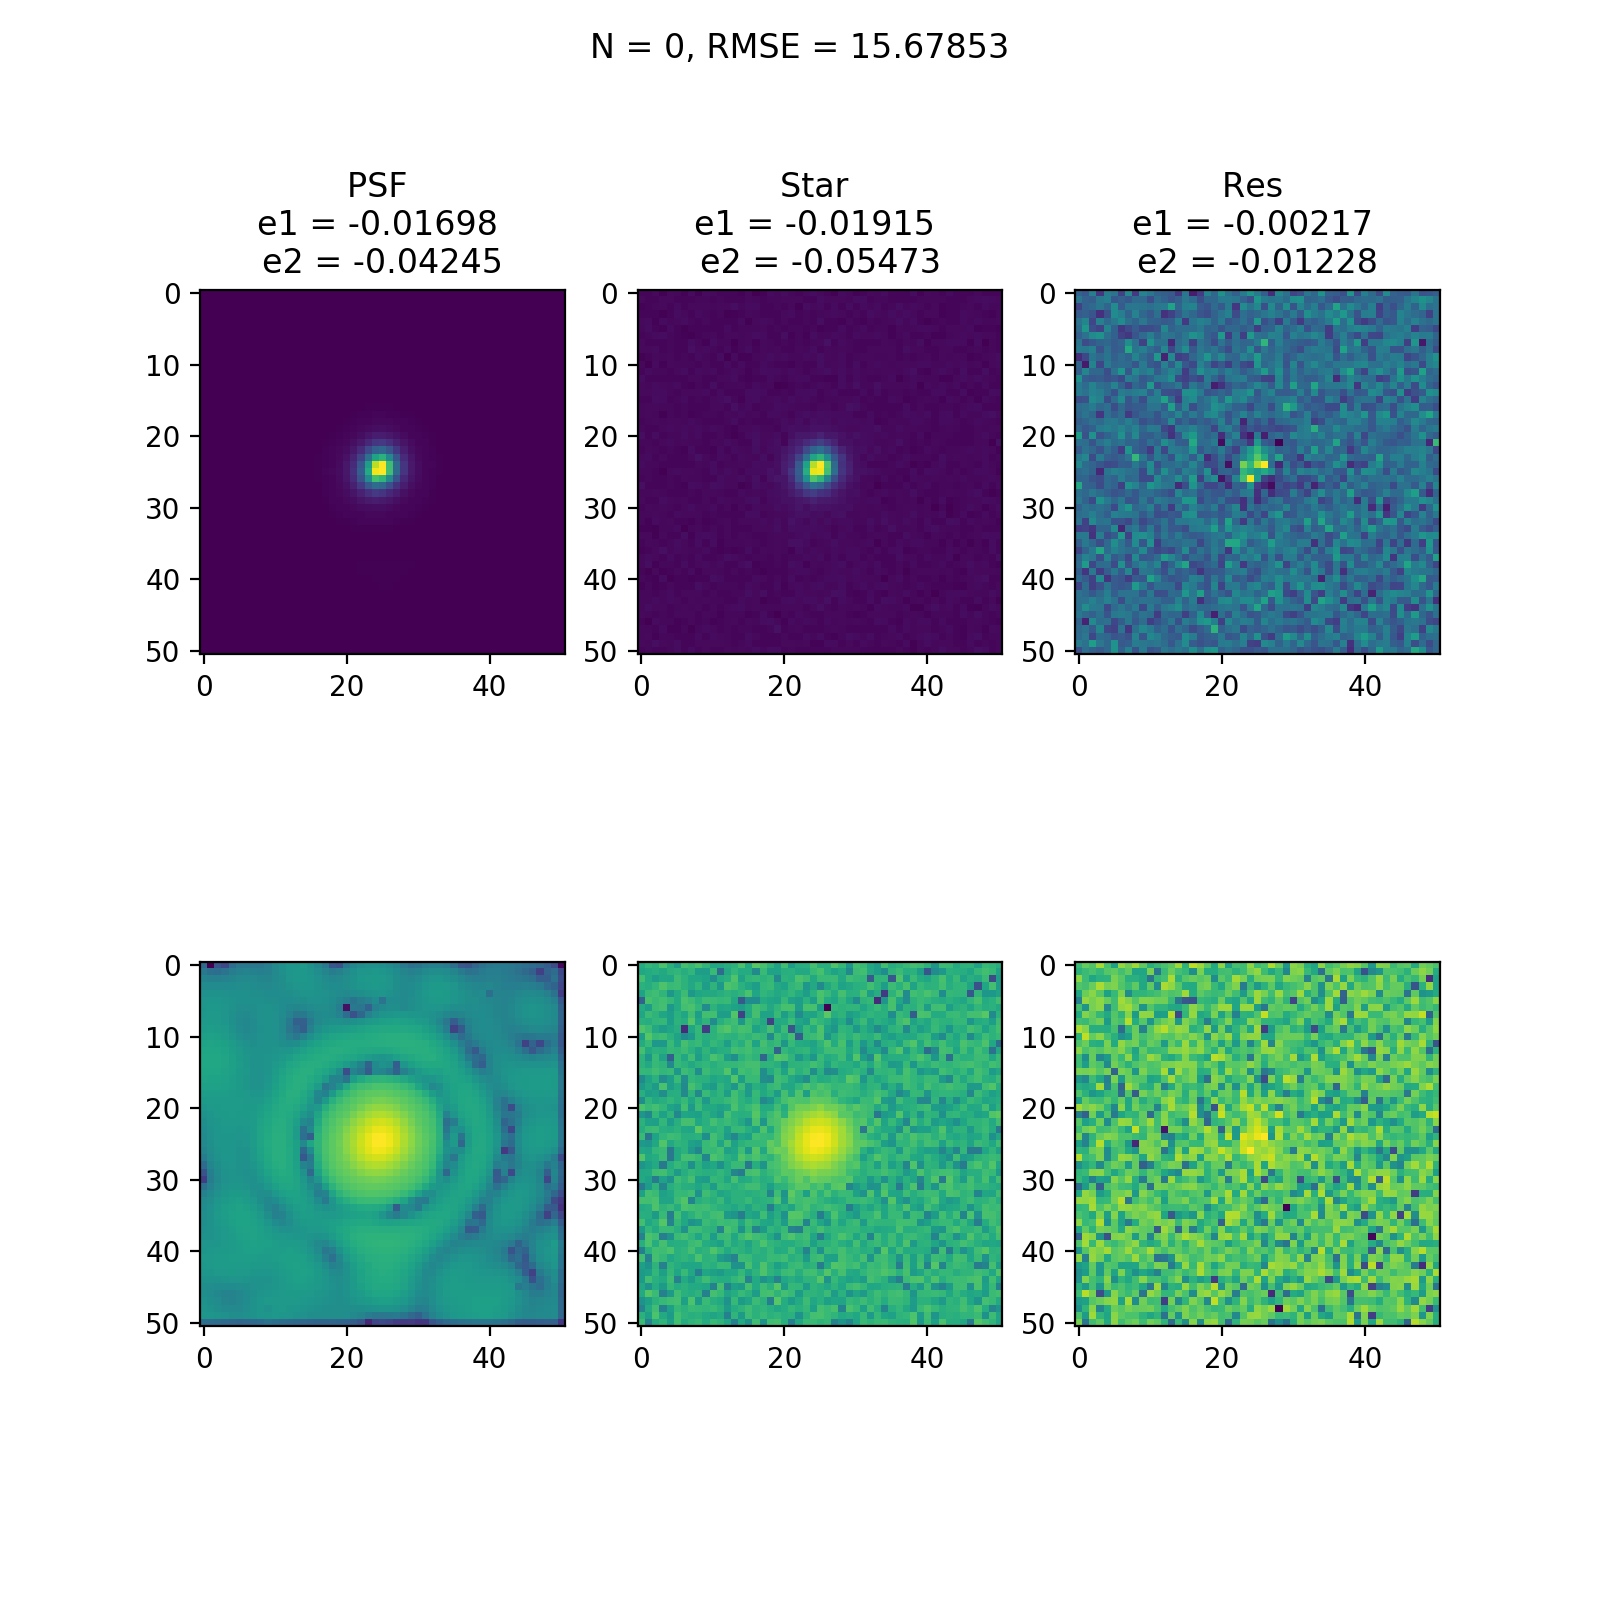

<IPython.core.display.Javascript object>


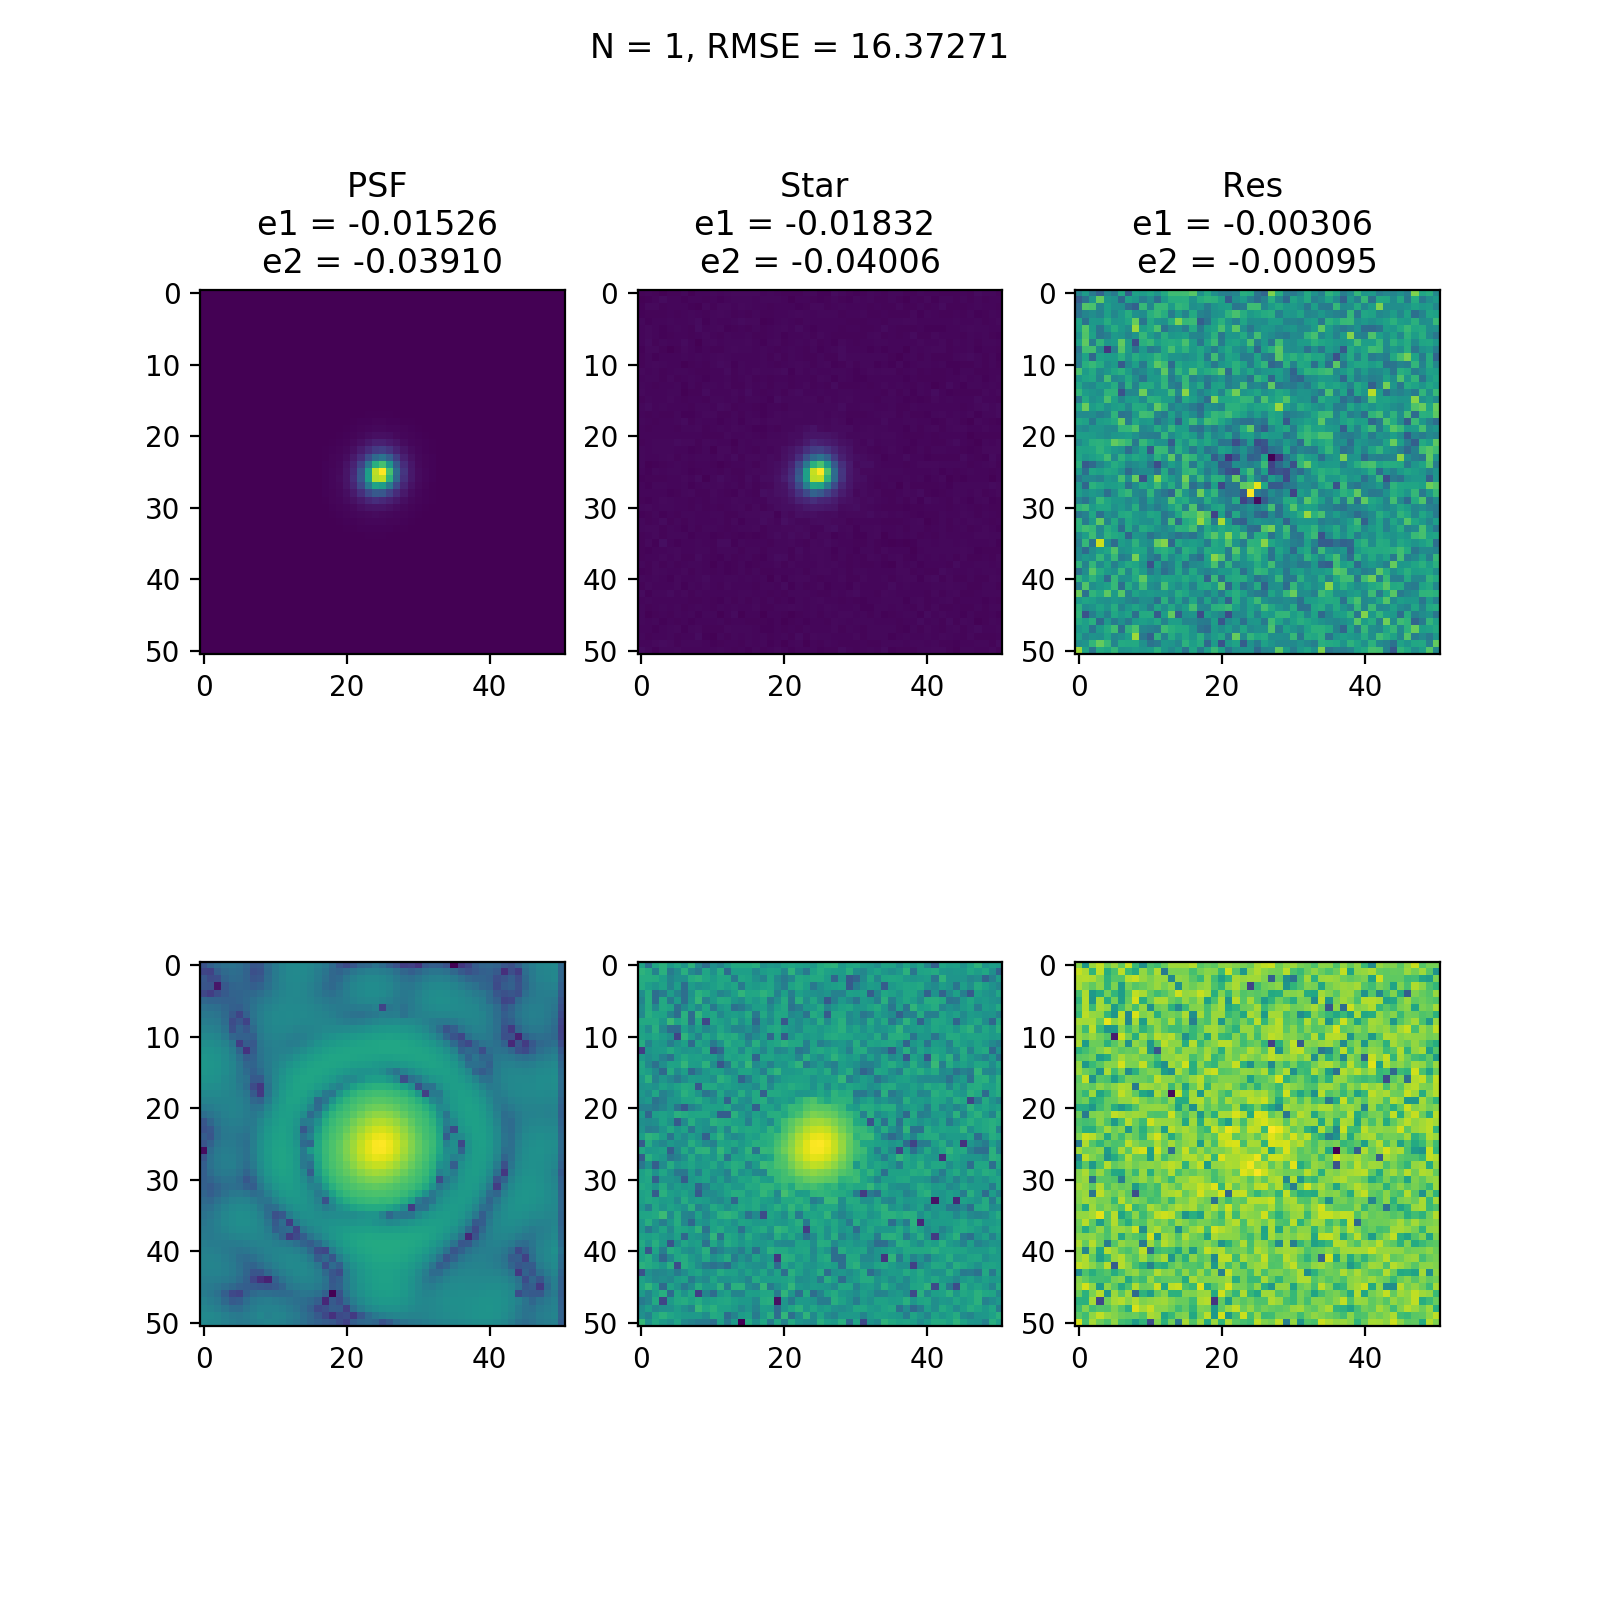

<IPython.core.display.Javascript object>


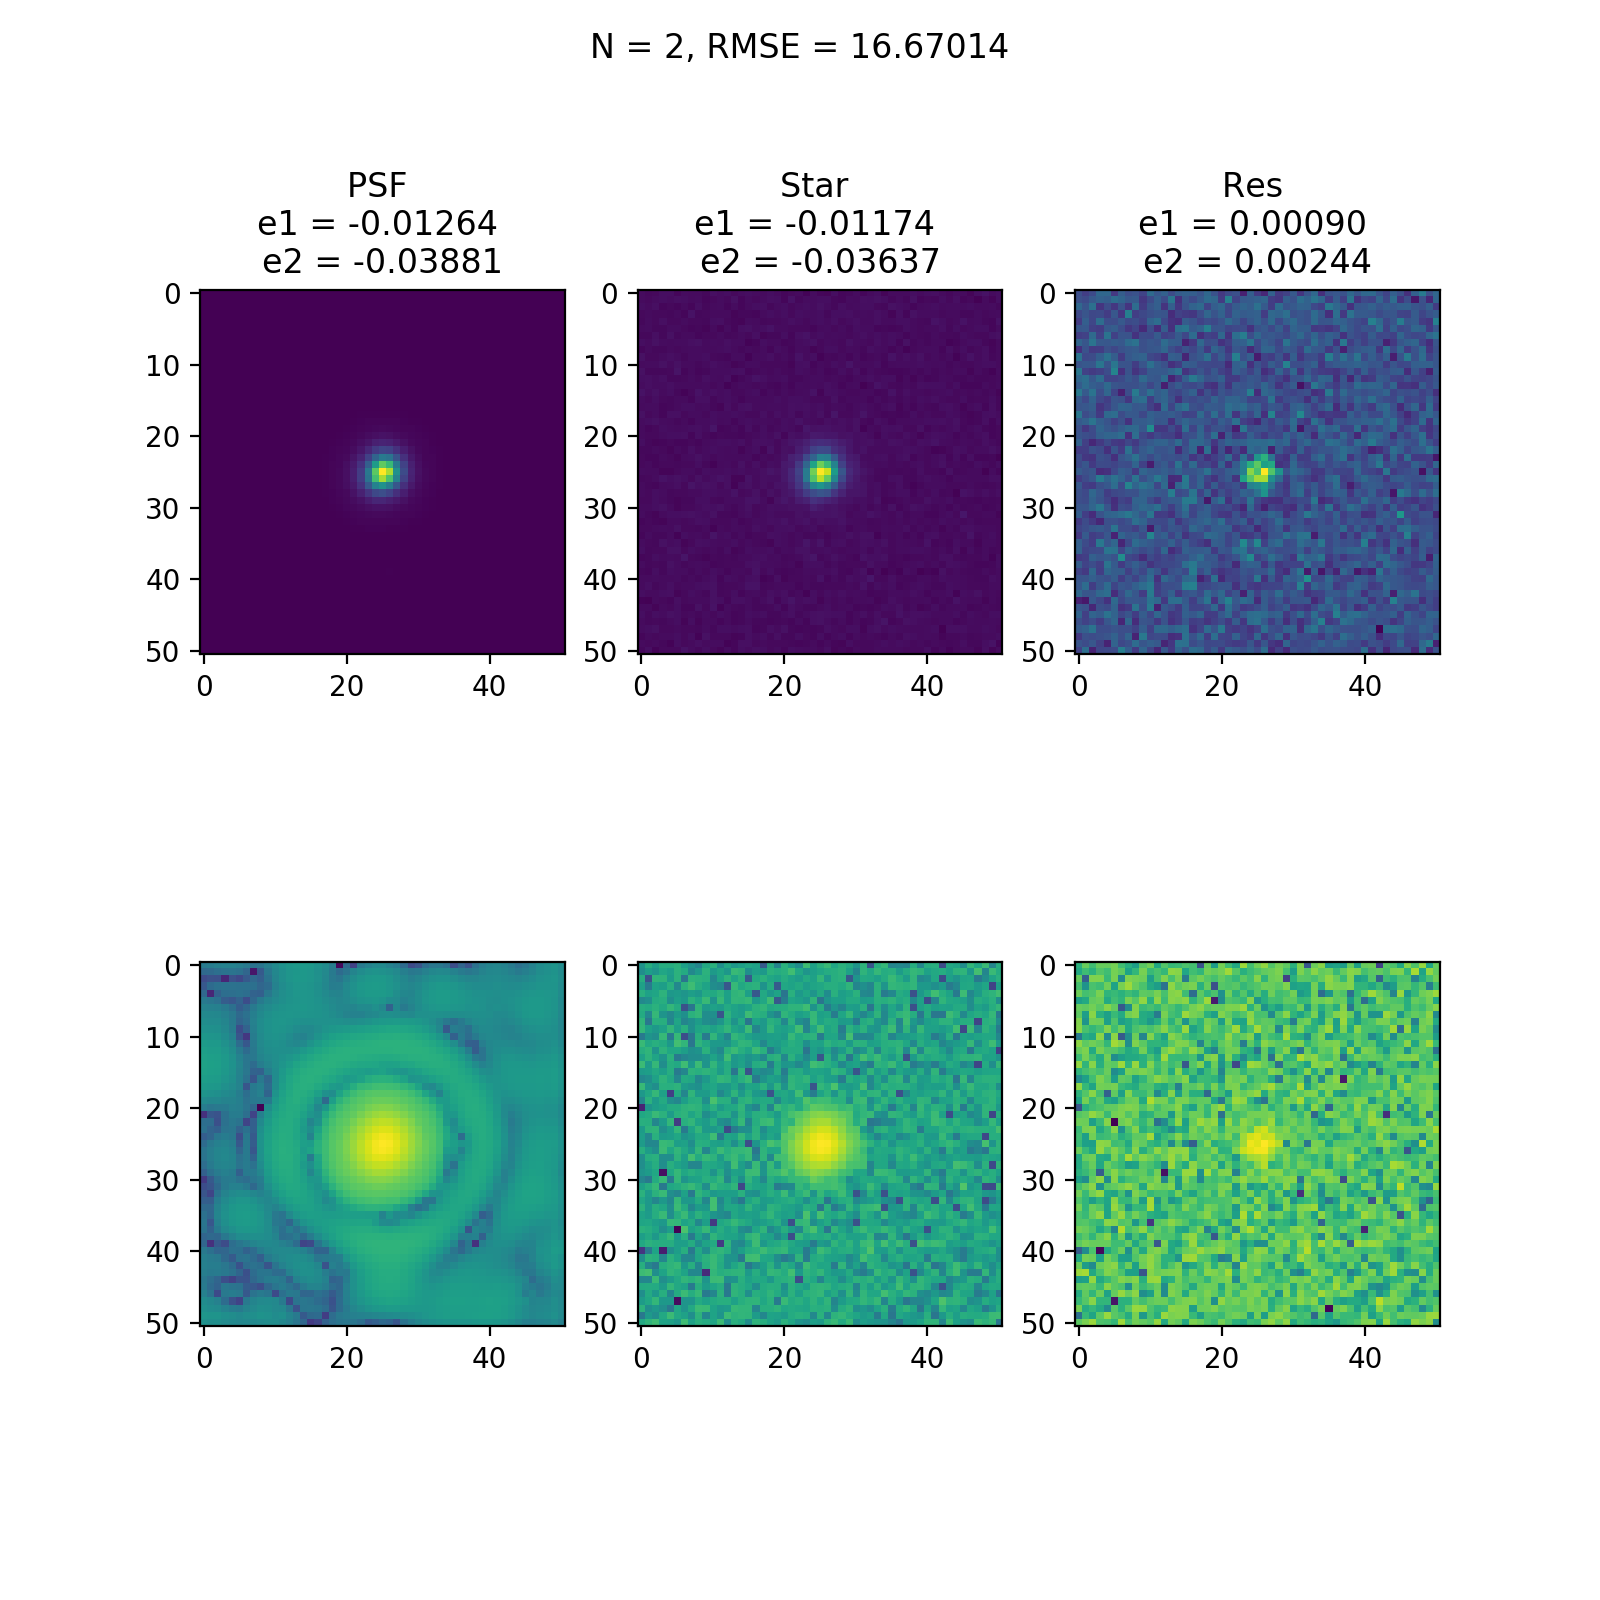

<IPython.core.display.Javascript object>


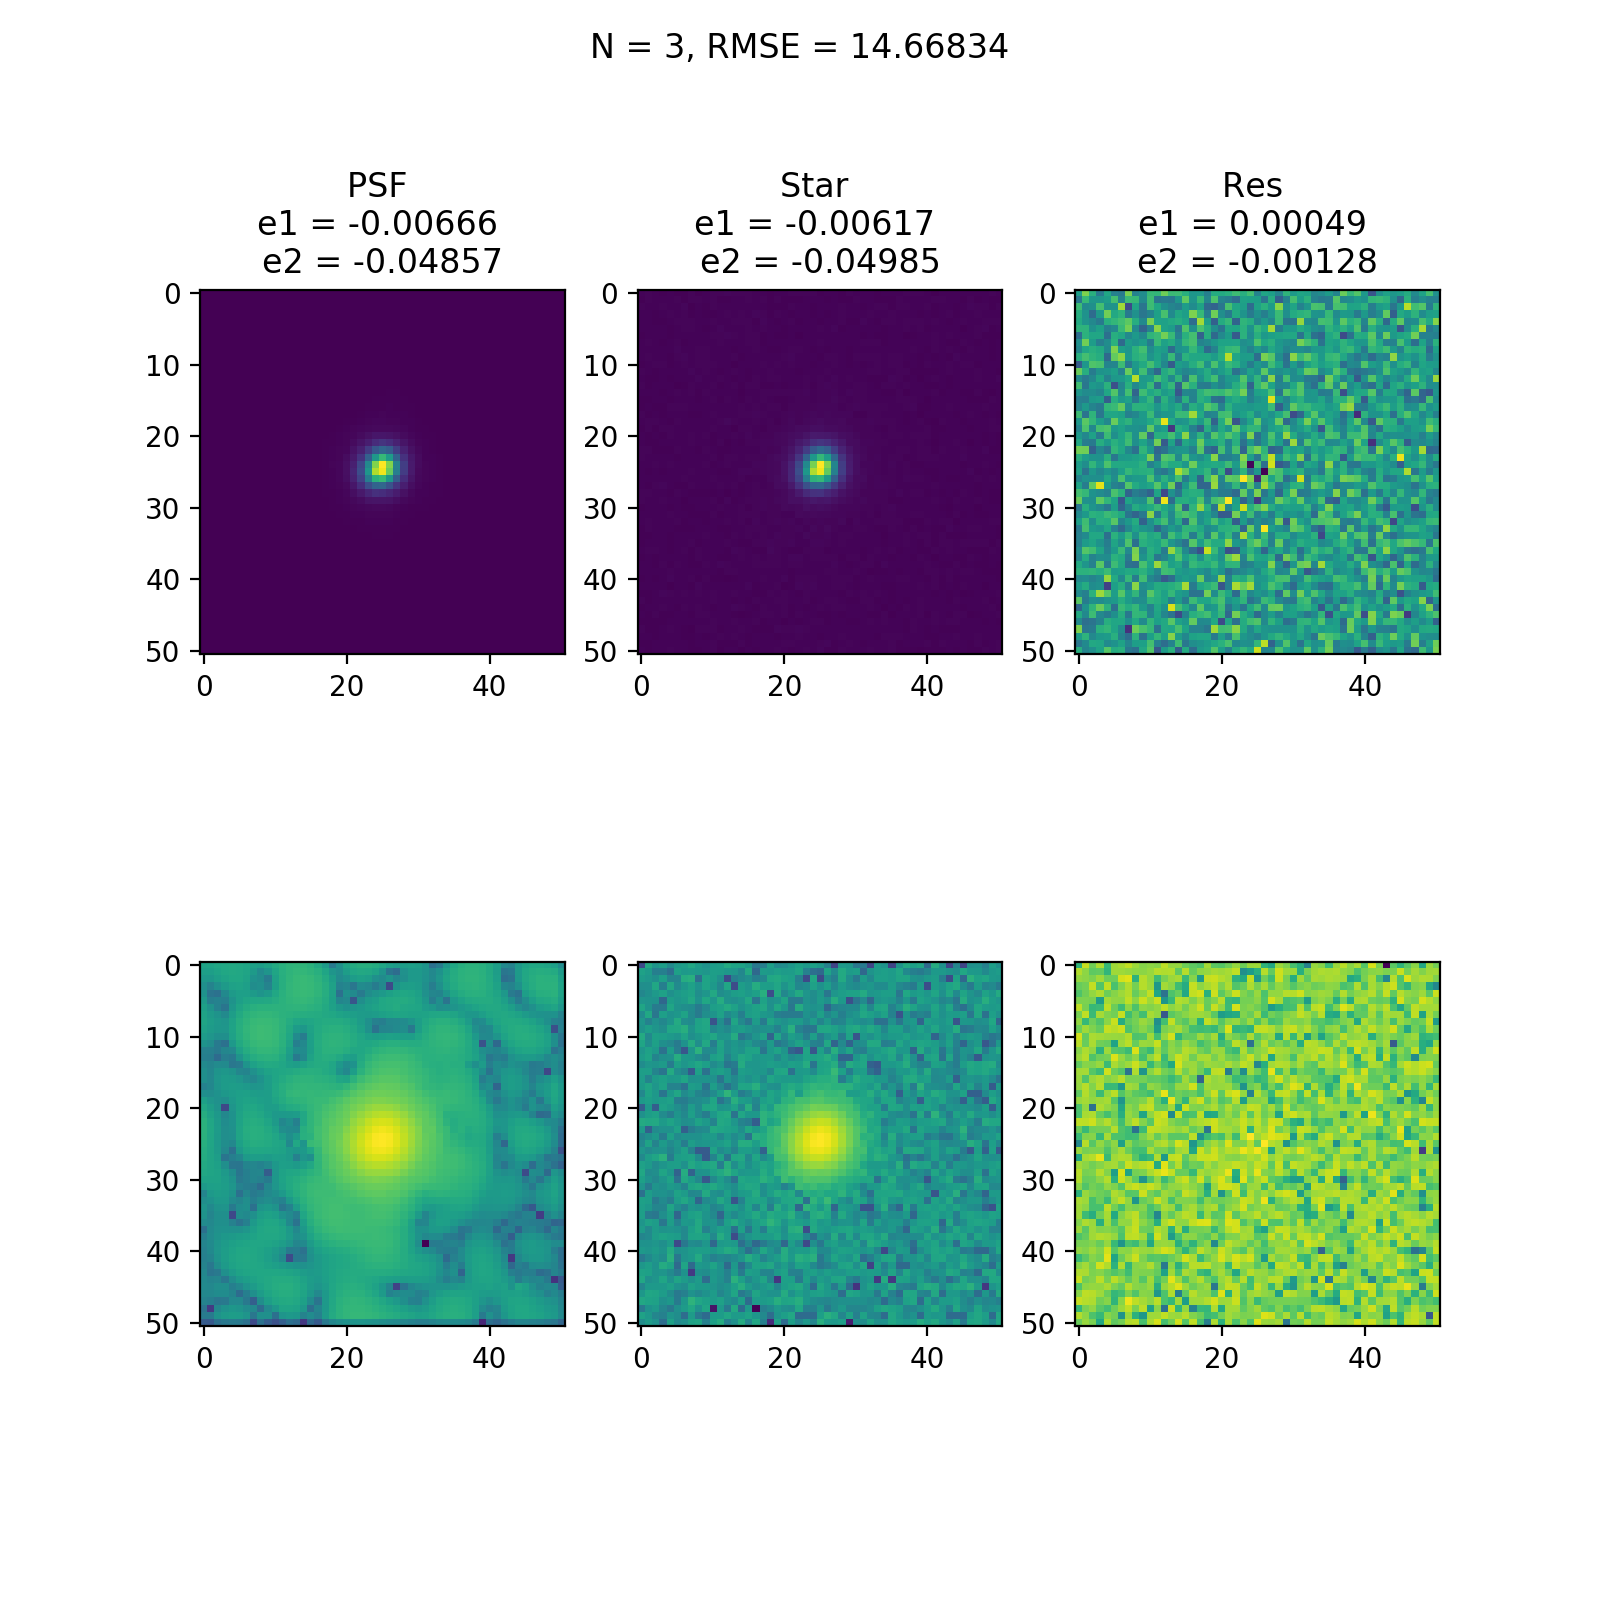

<IPython.core.display.Javascript object>


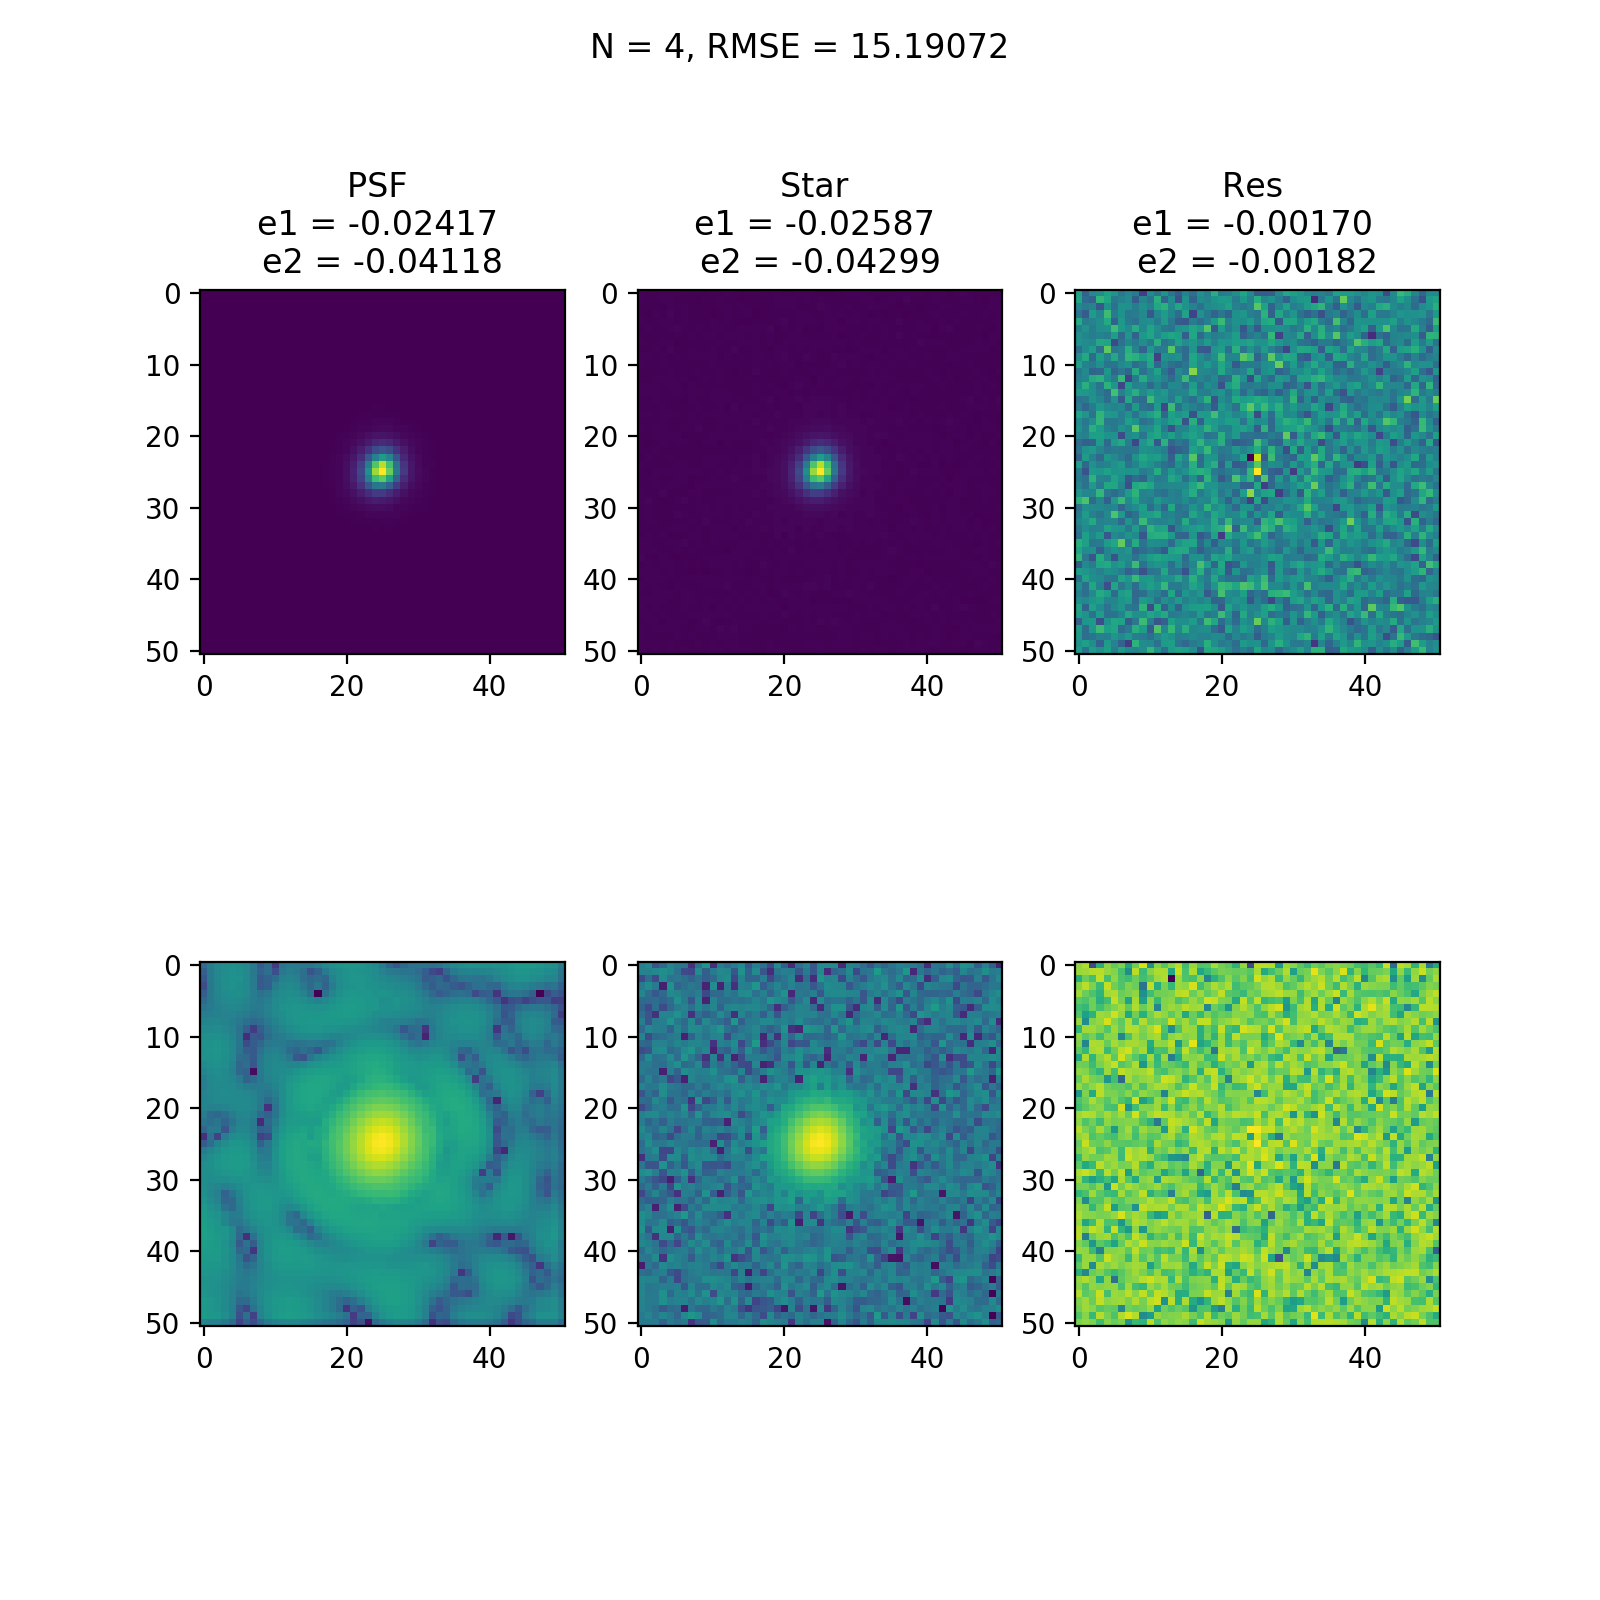

<IPython.core.display.Javascript object>


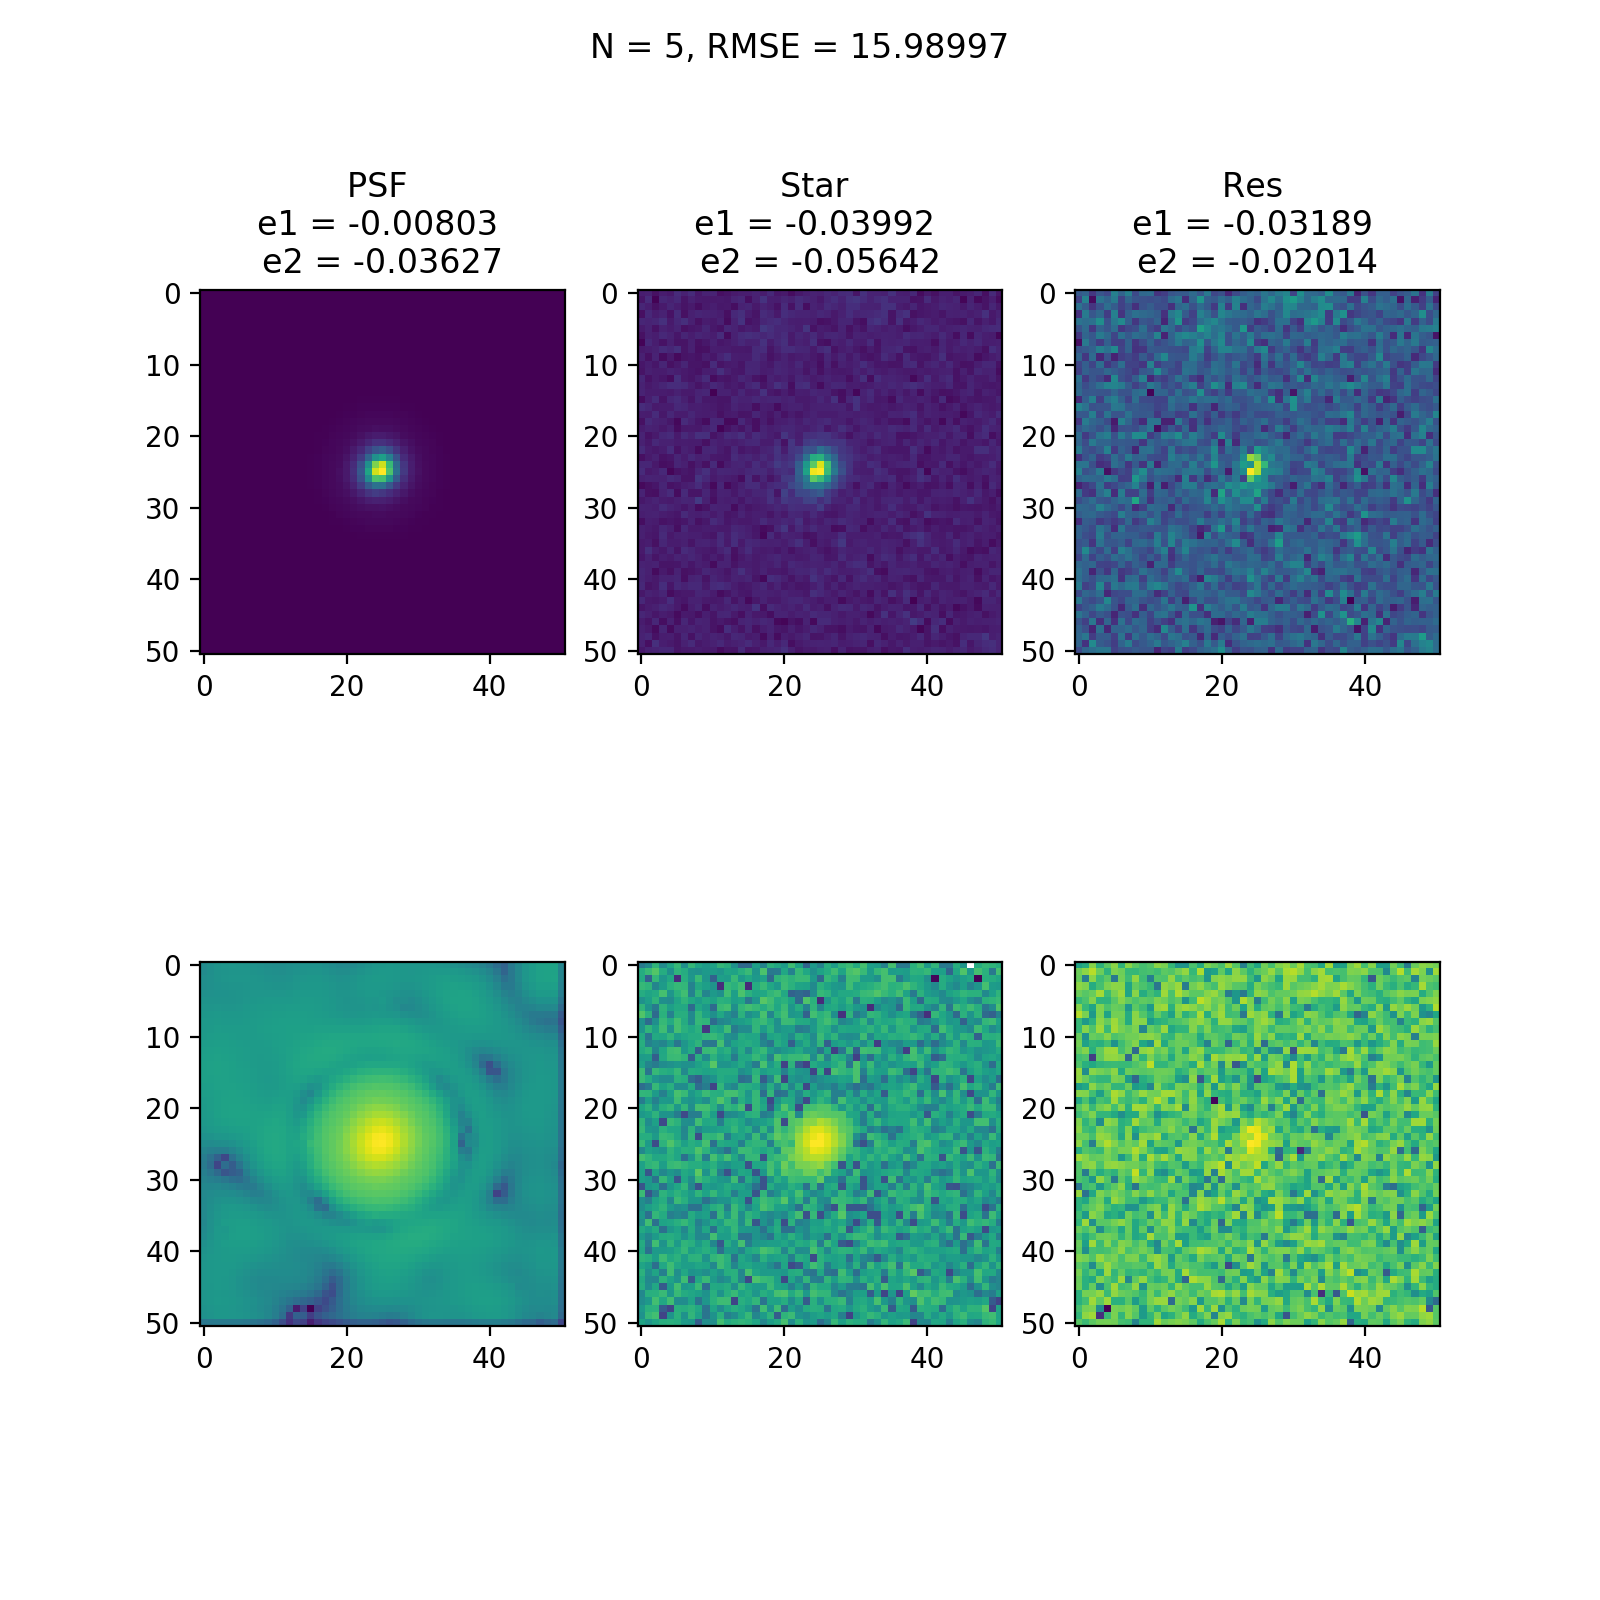

/Users/tliaudat/opt/anaconda3/envs/shapepipe/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Javascript object>


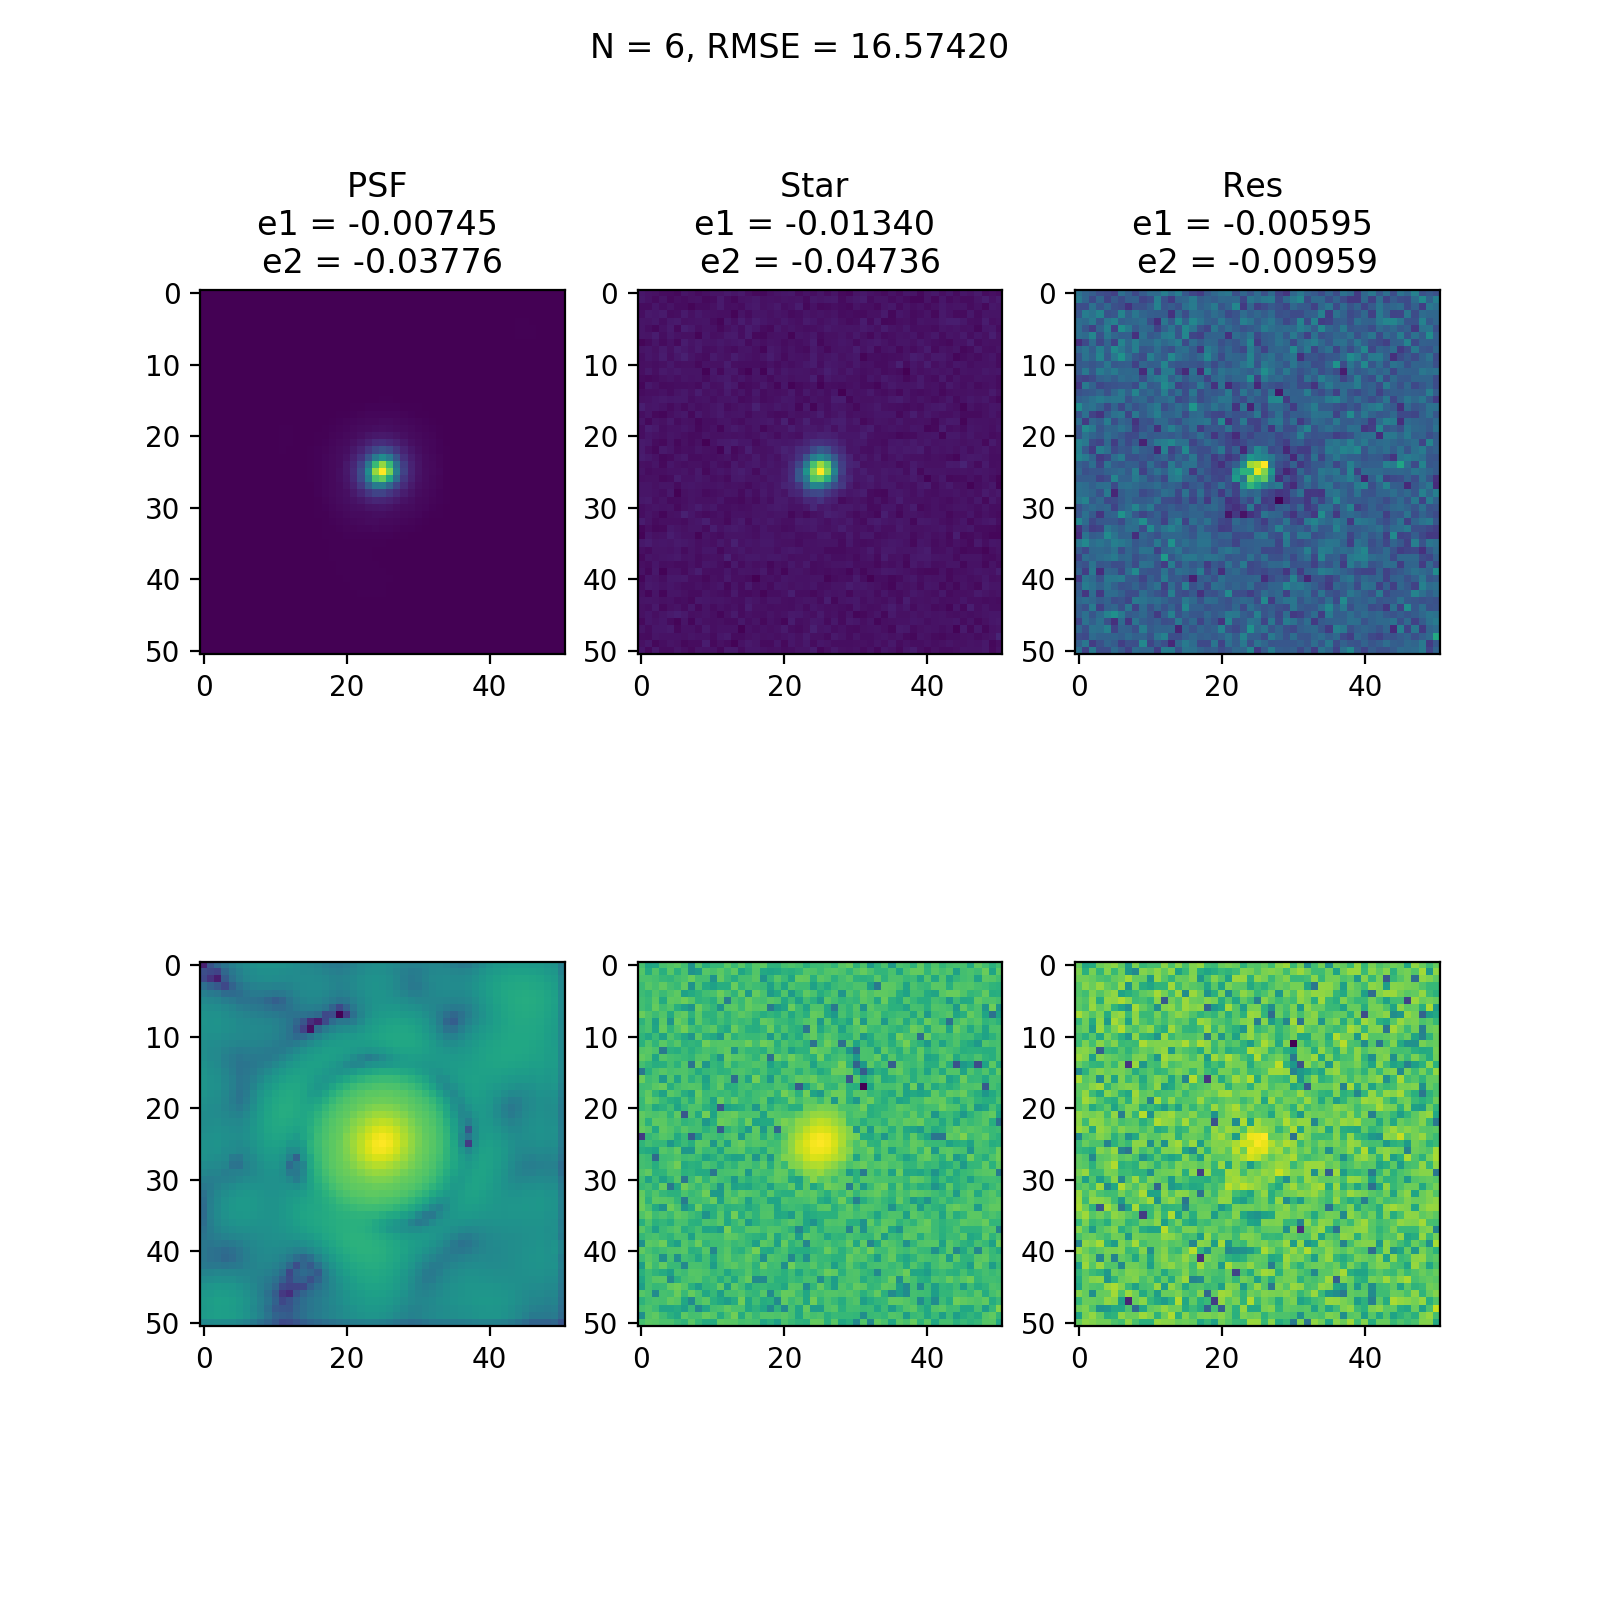

<IPython.core.display.Javascript object>


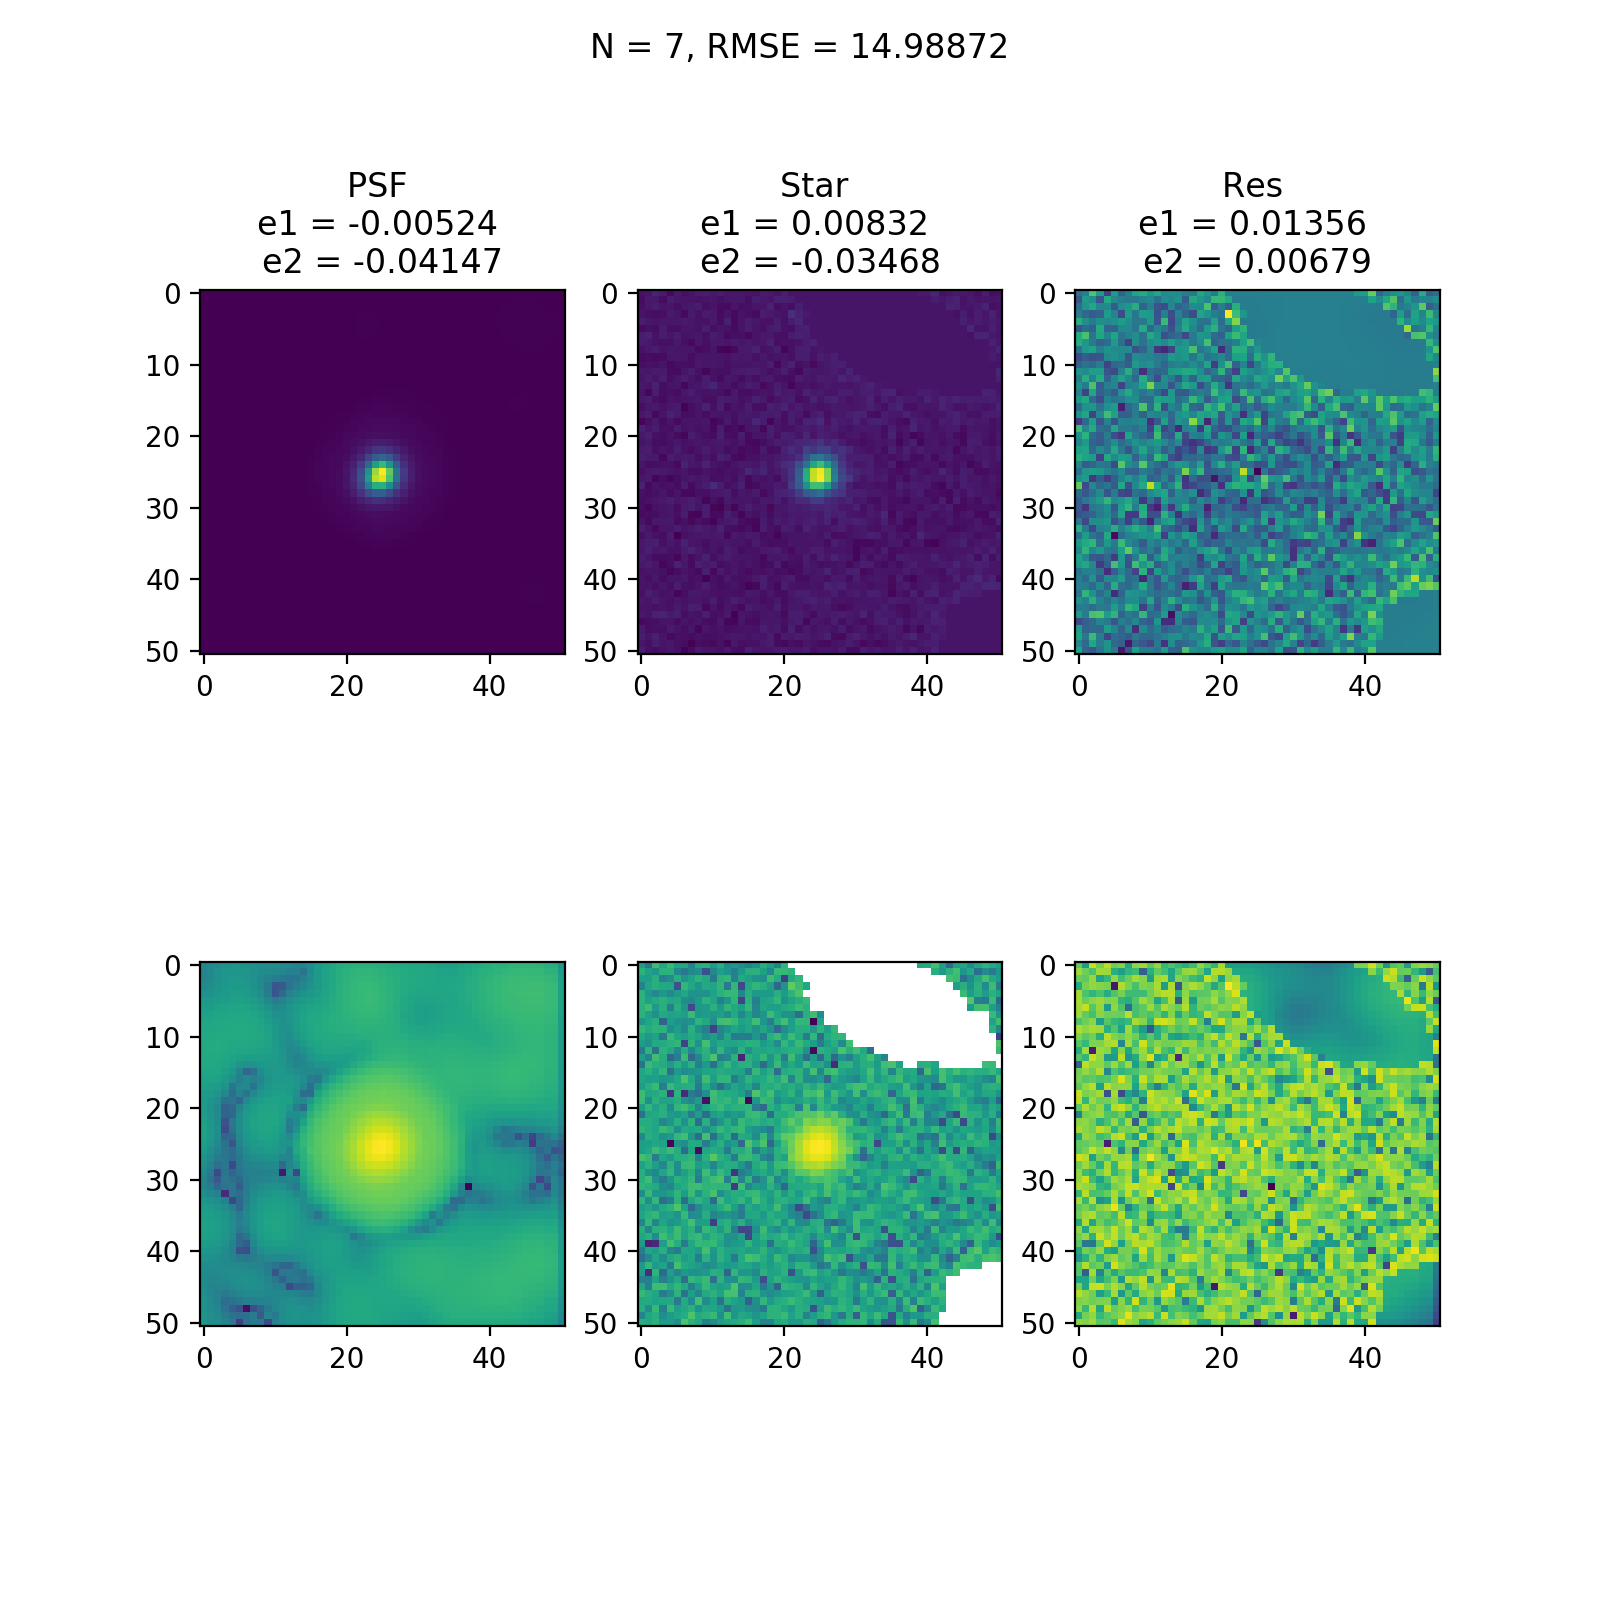

<IPython.core.display.Javascript object>


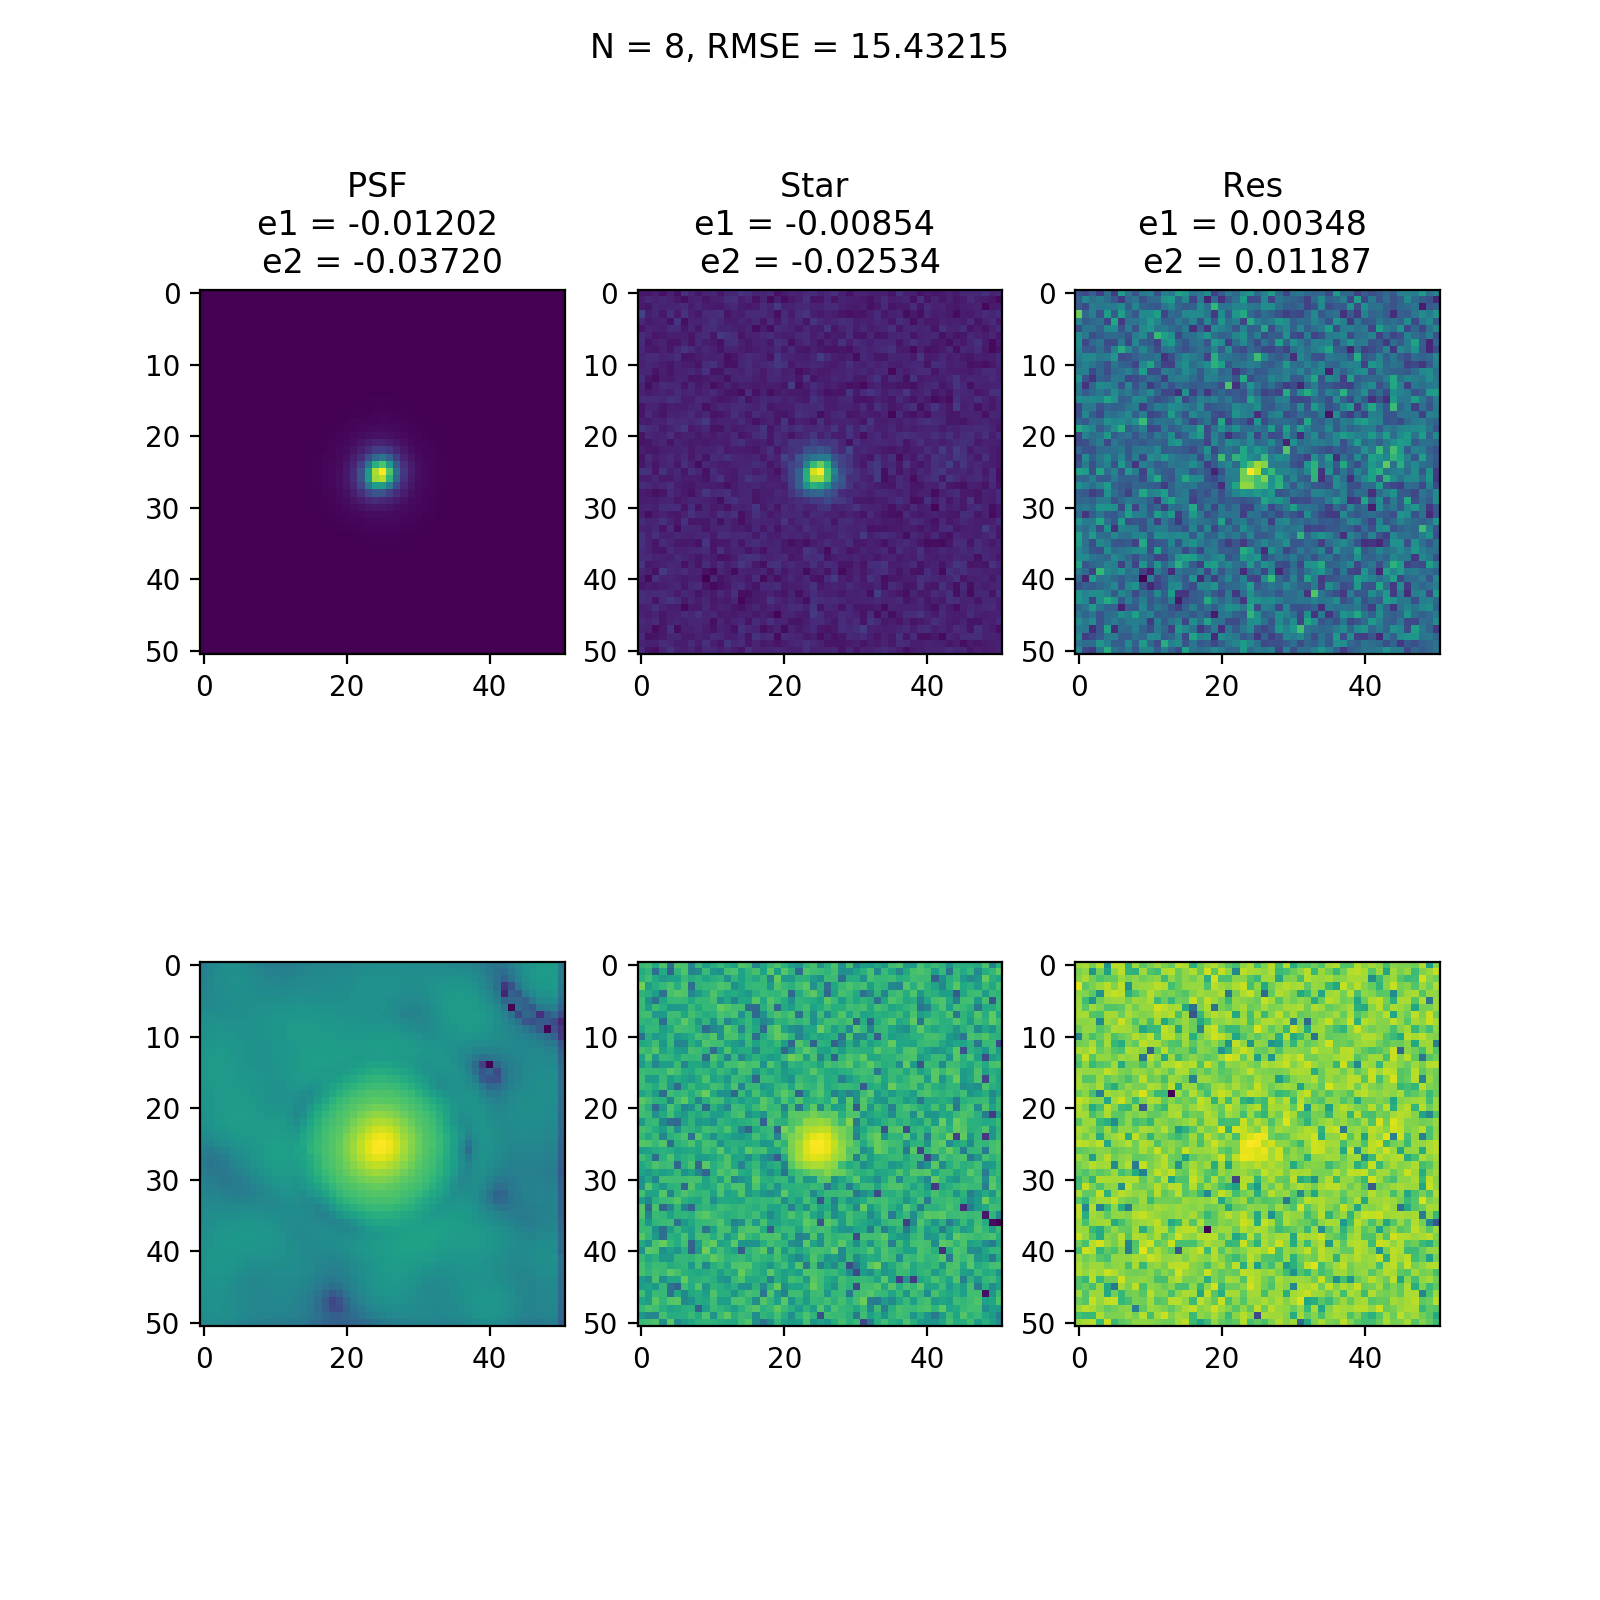

<IPython.core.display.Javascript object>


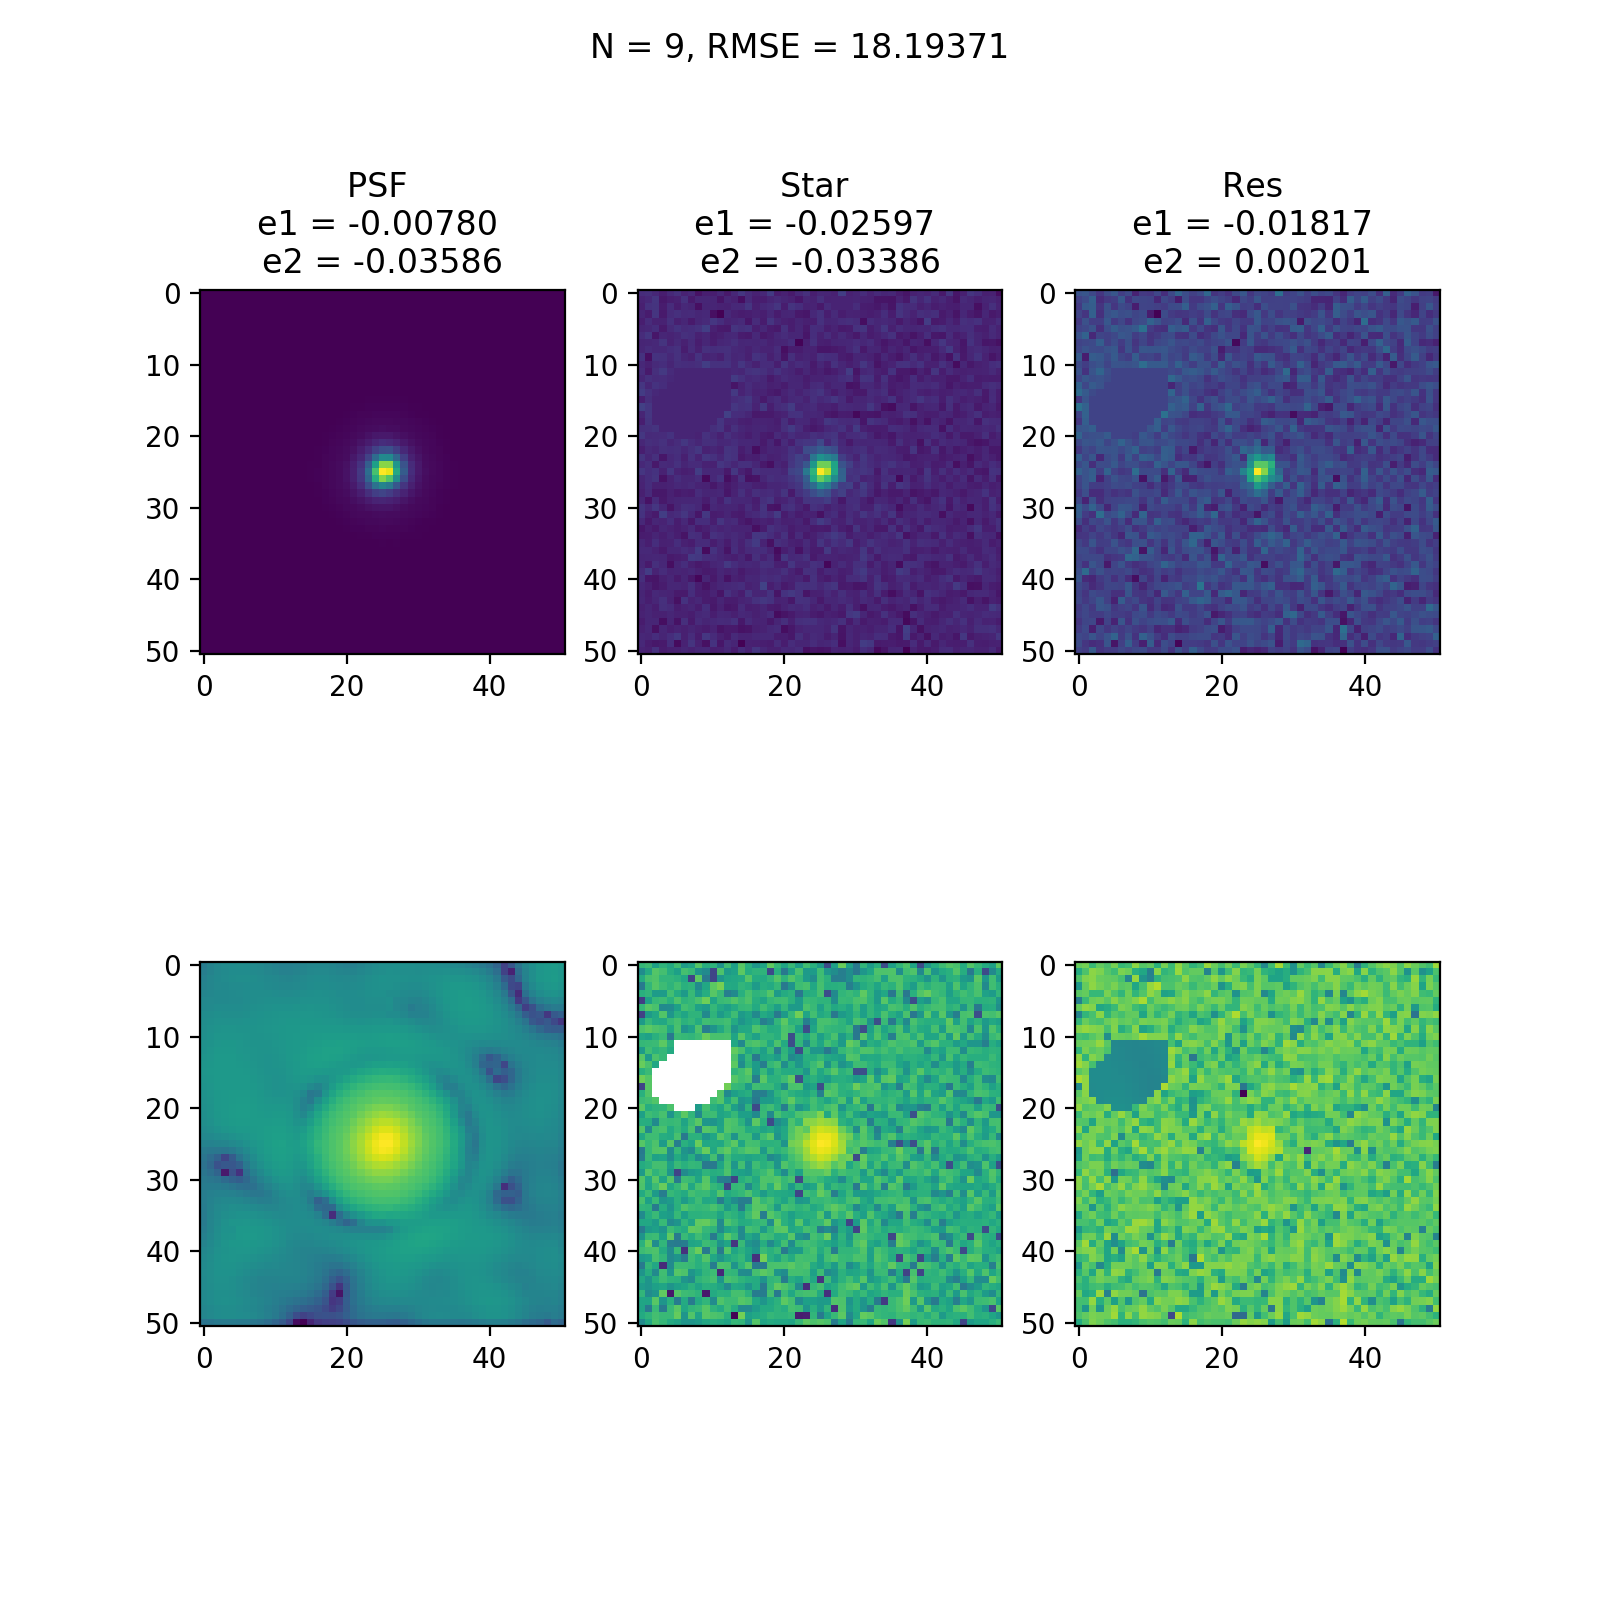

<IPython.core.display.Javascript object>


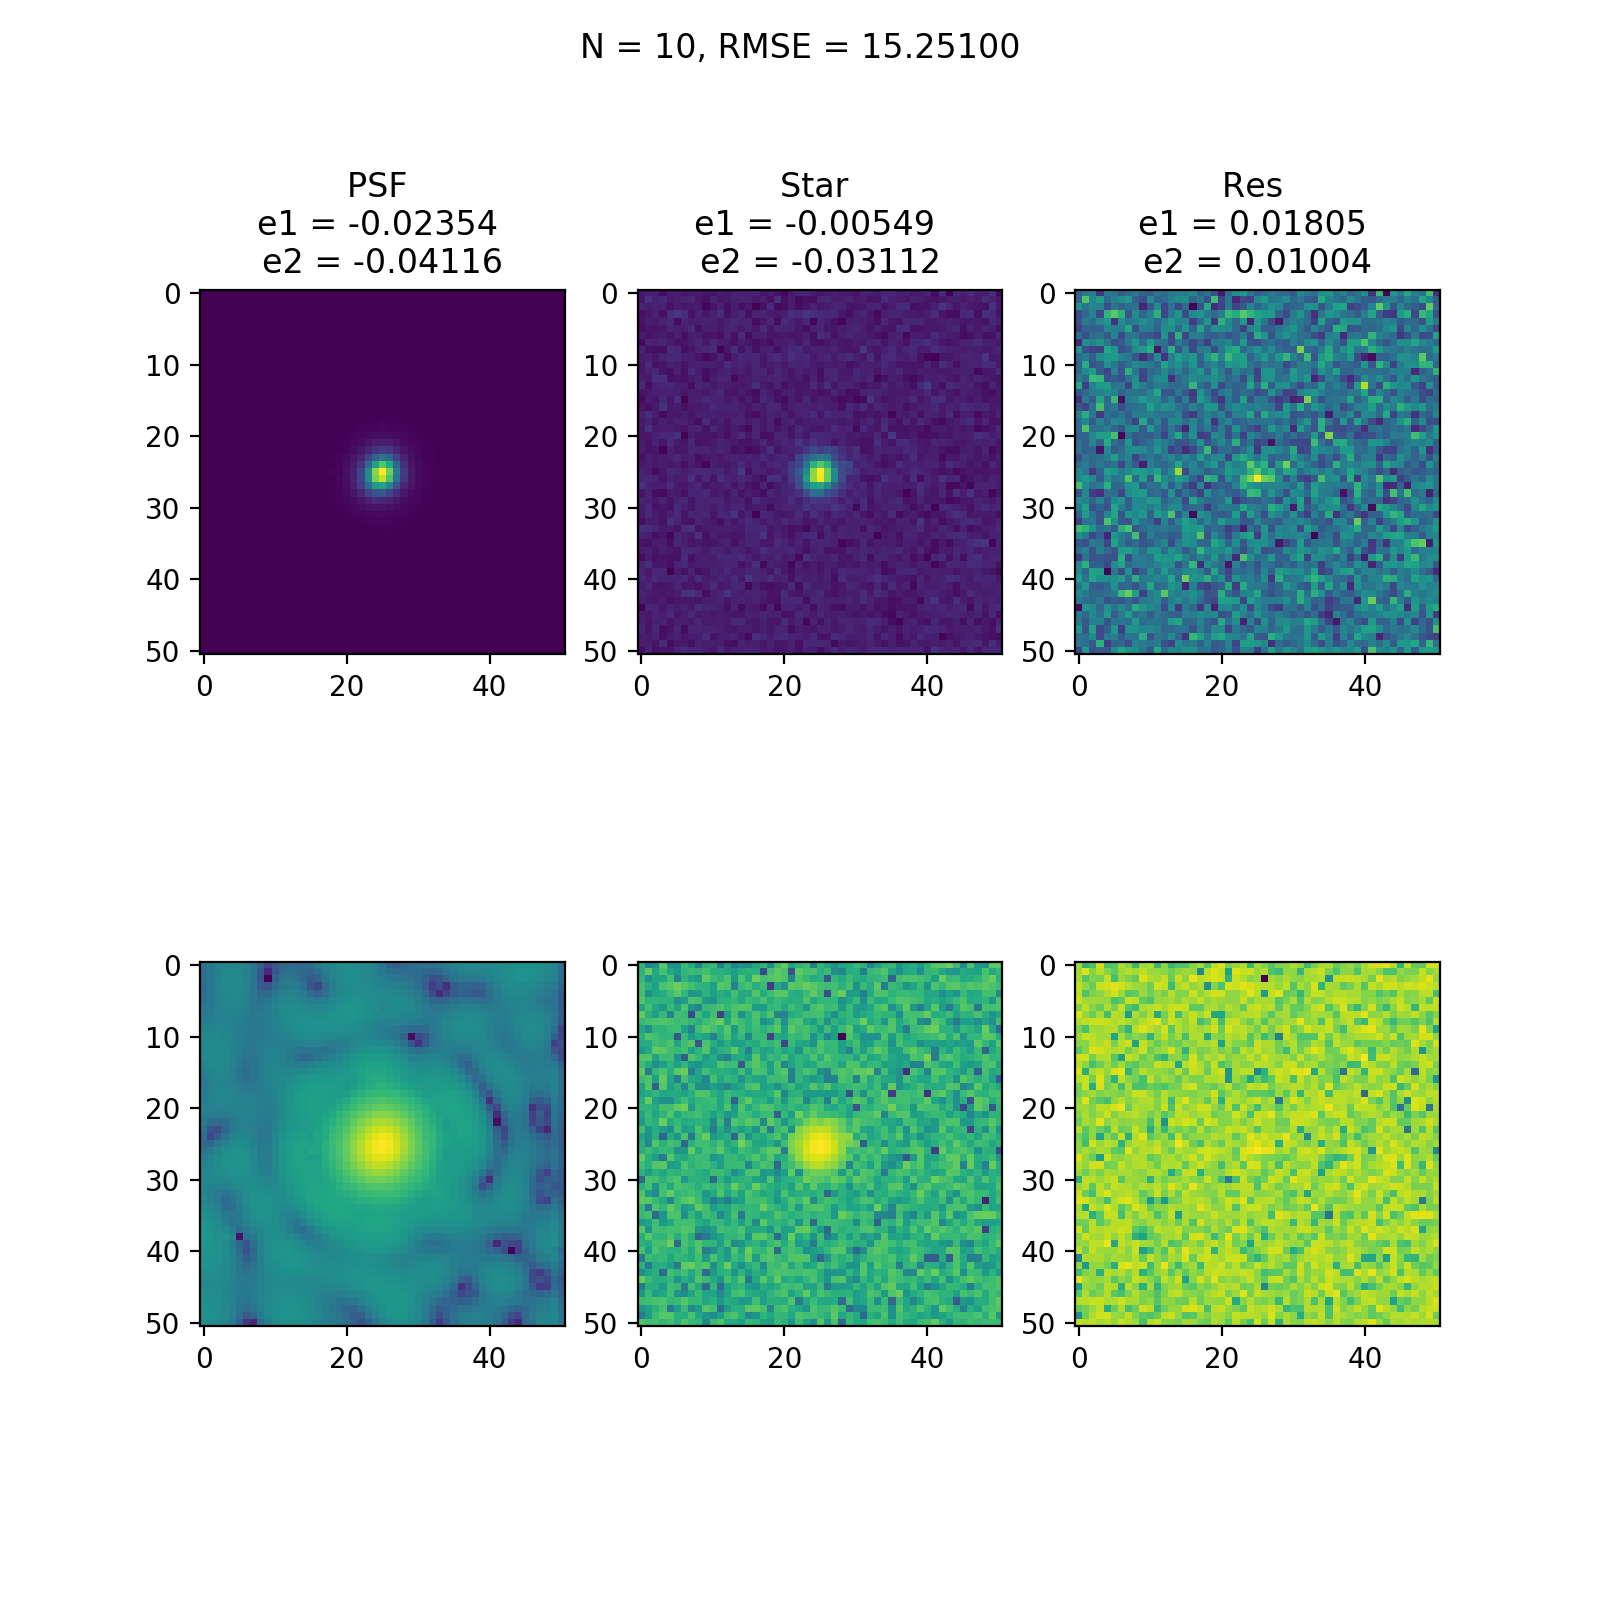

<IPython.core.display.Javascript object>


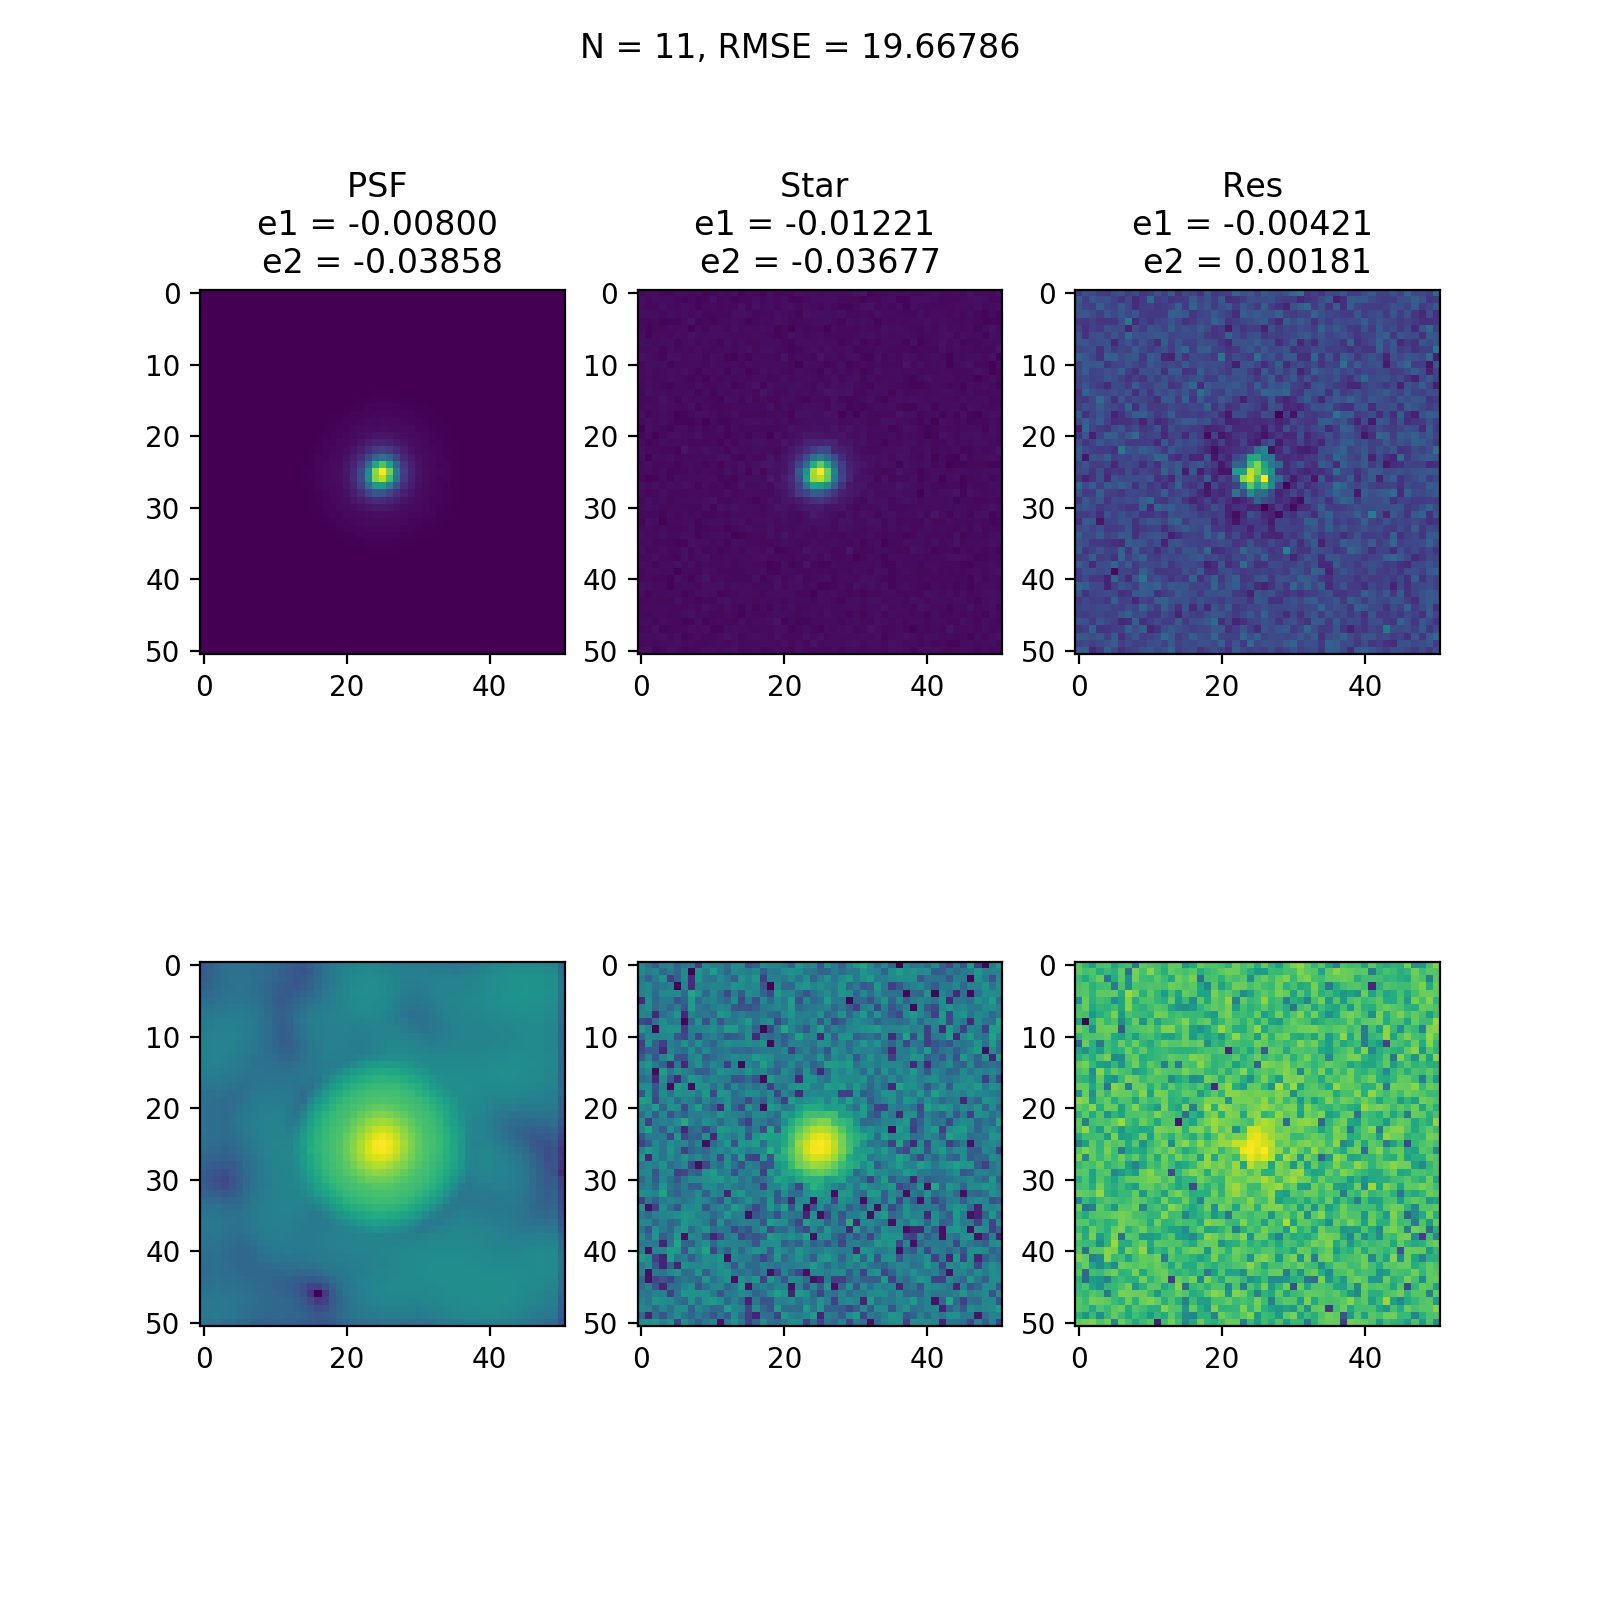

<IPython.core.display.Javascript object>


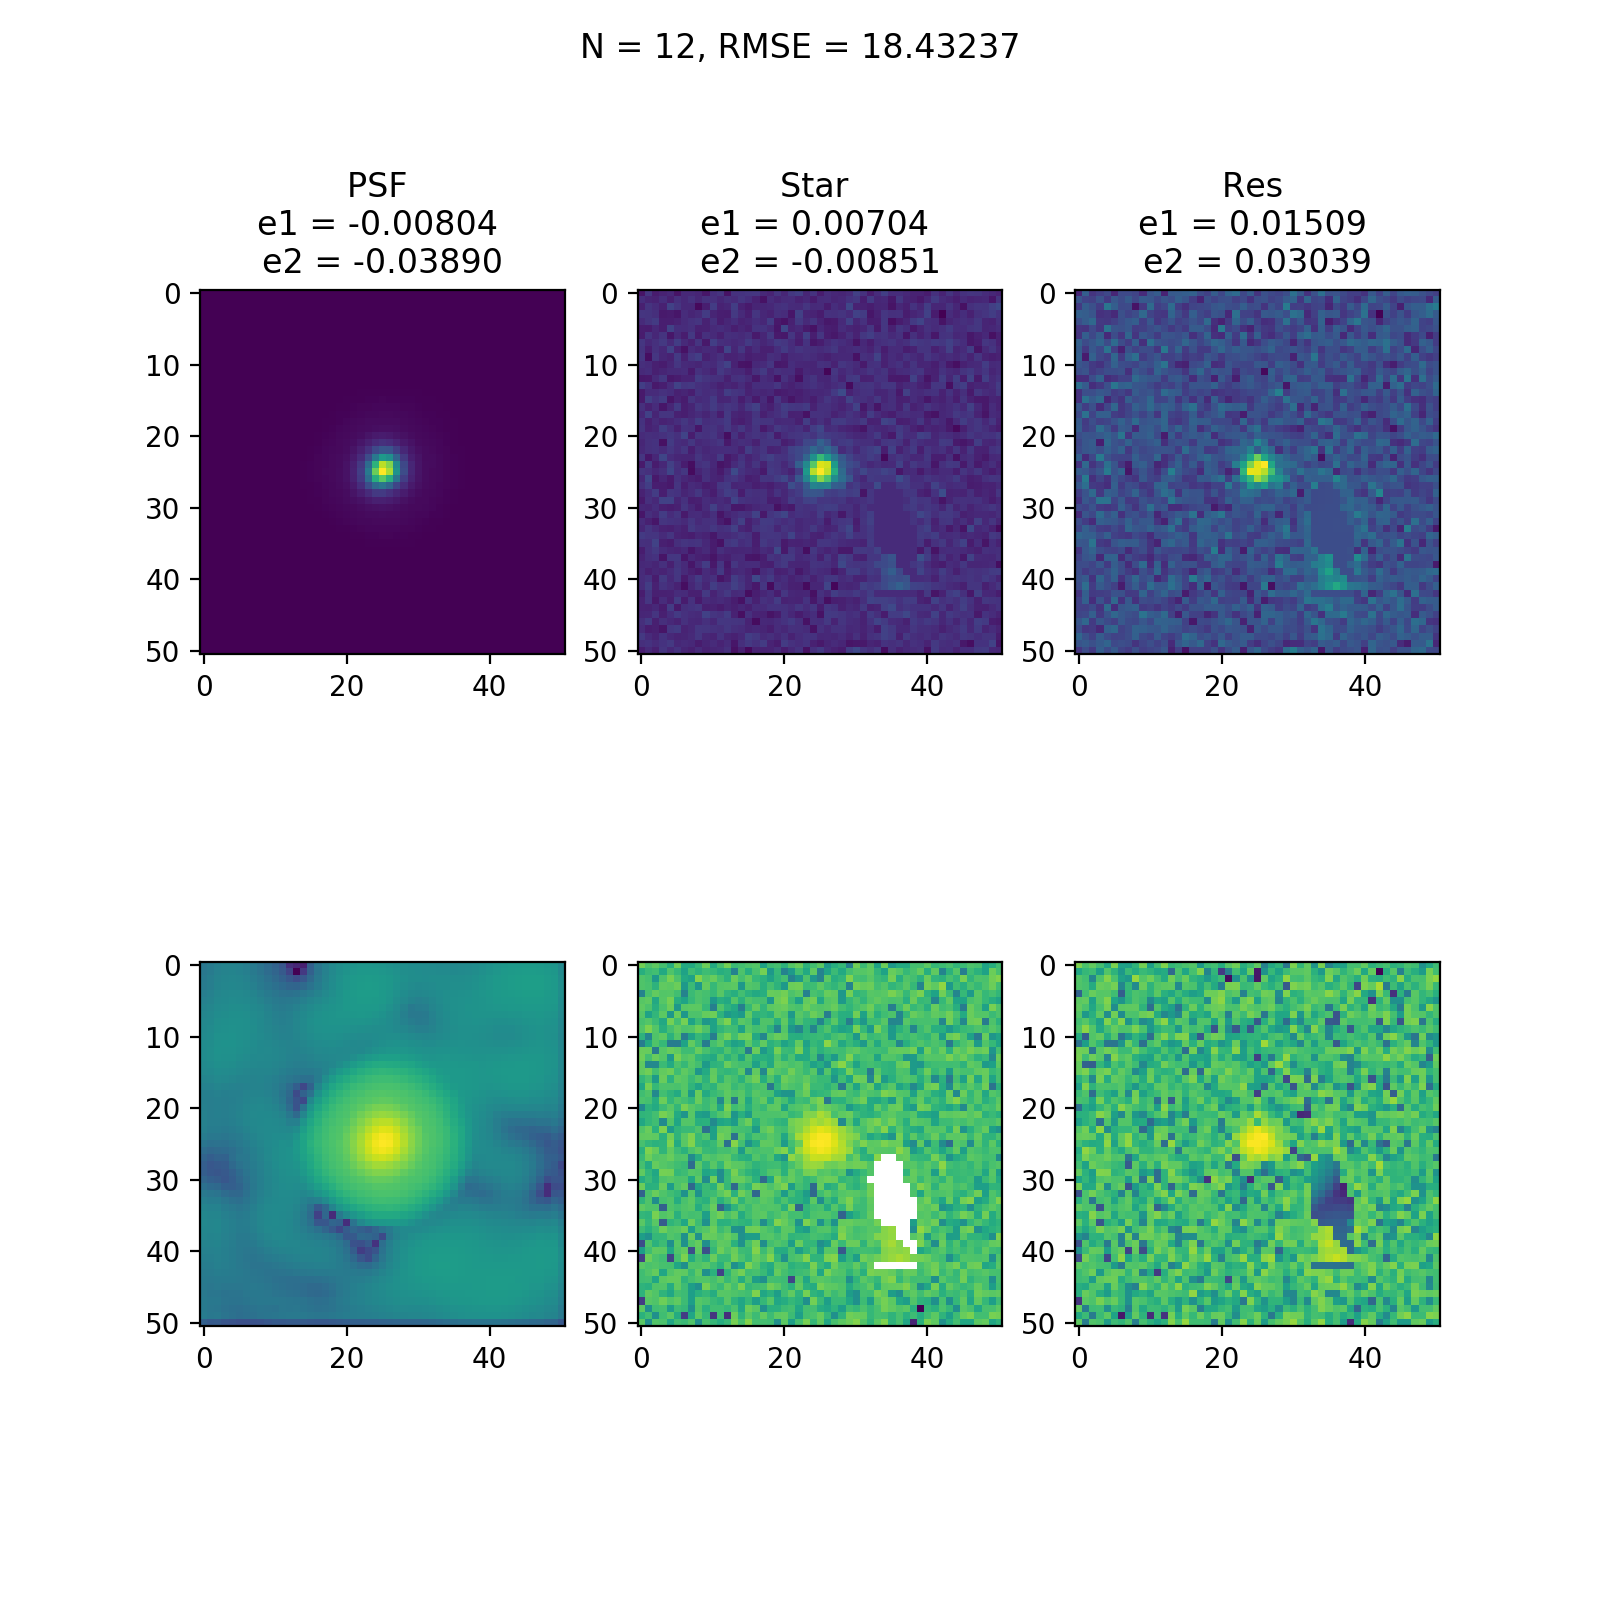

<IPython.core.display.Javascript object>


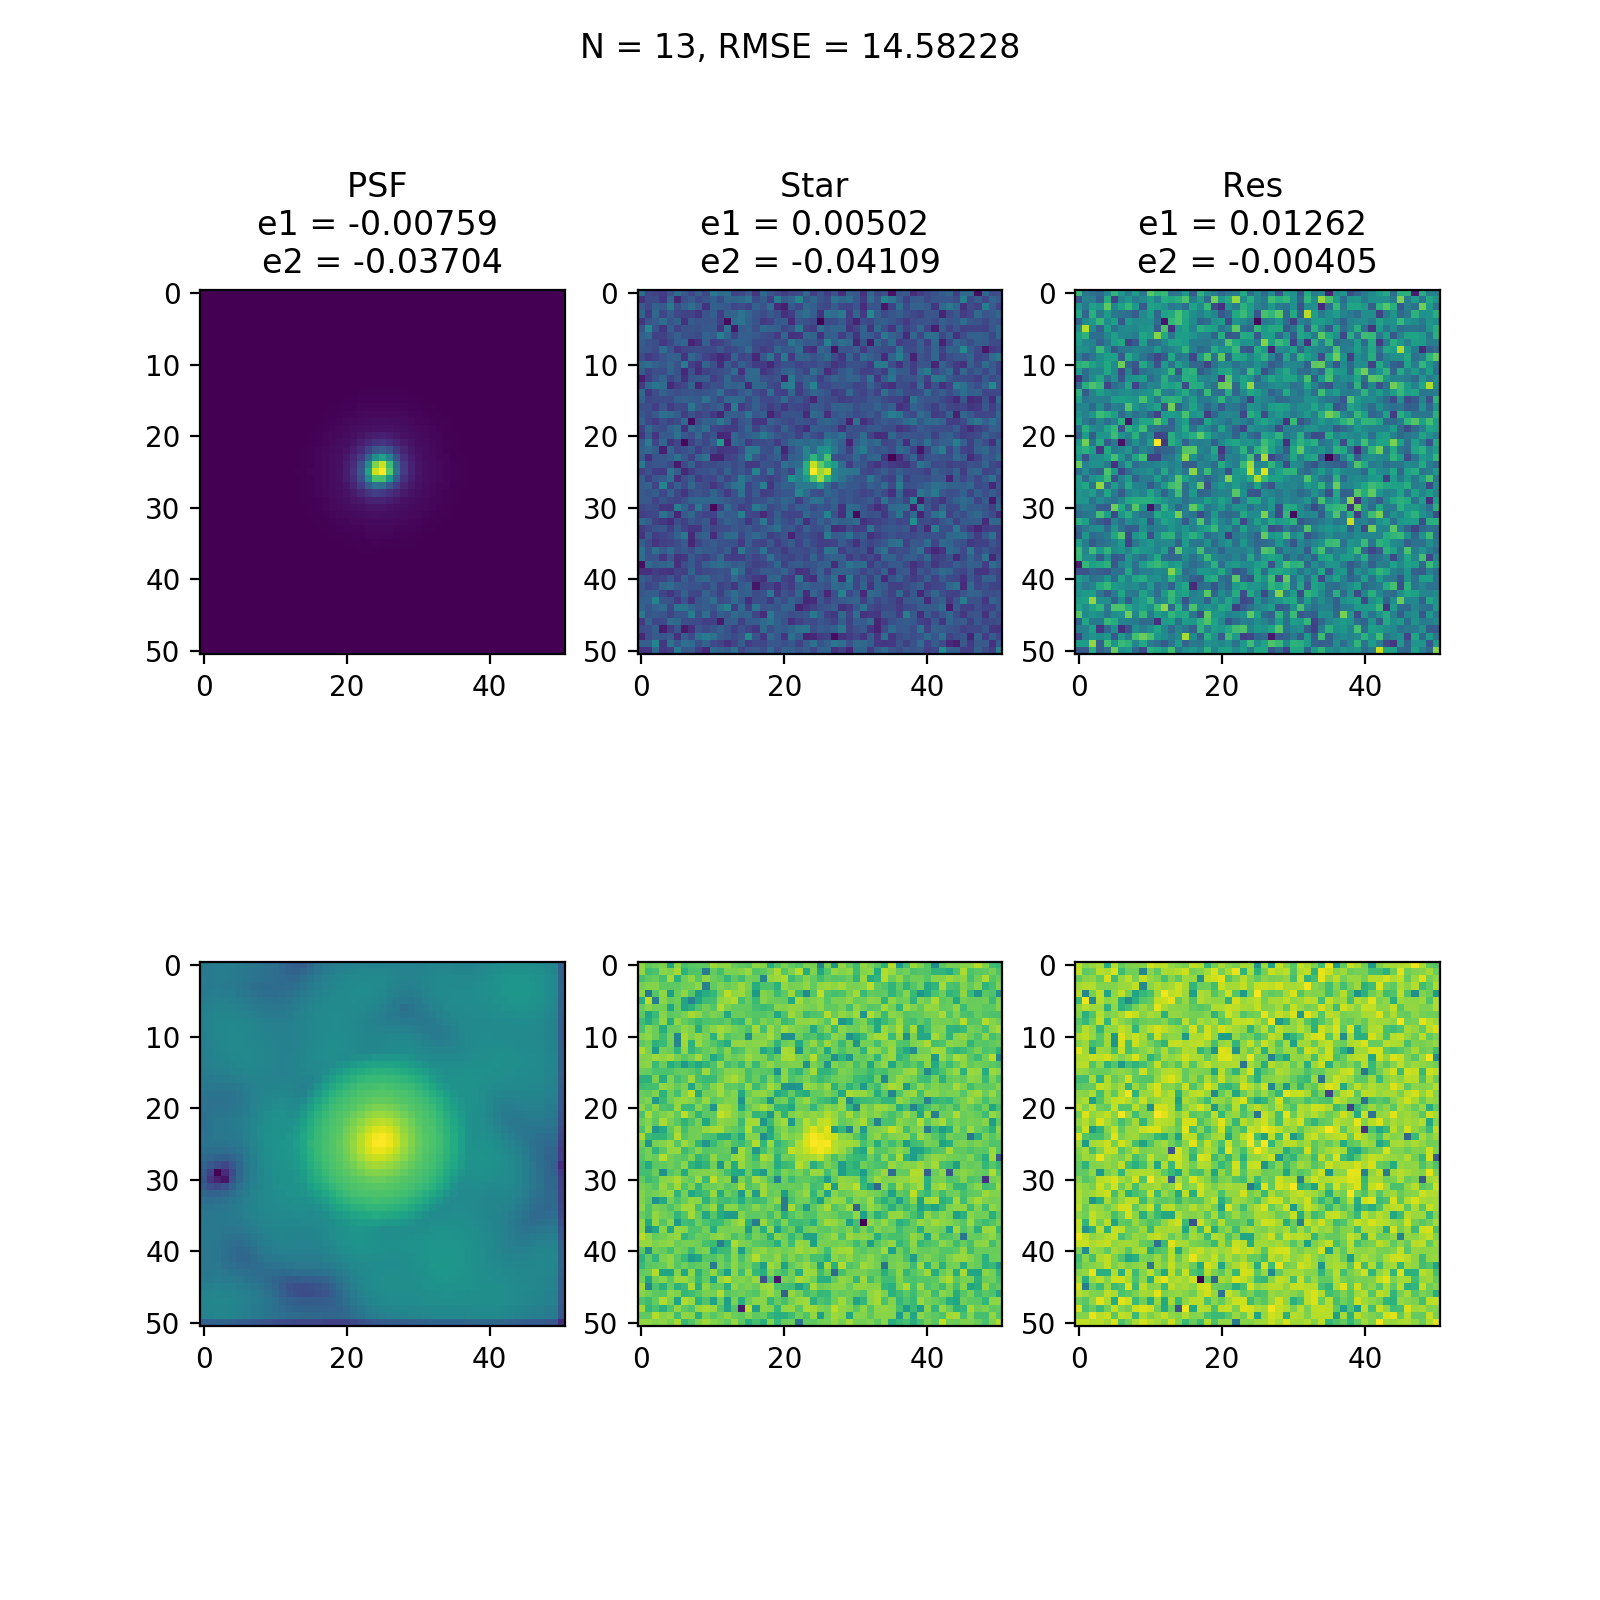

<IPython.core.display.Javascript object>


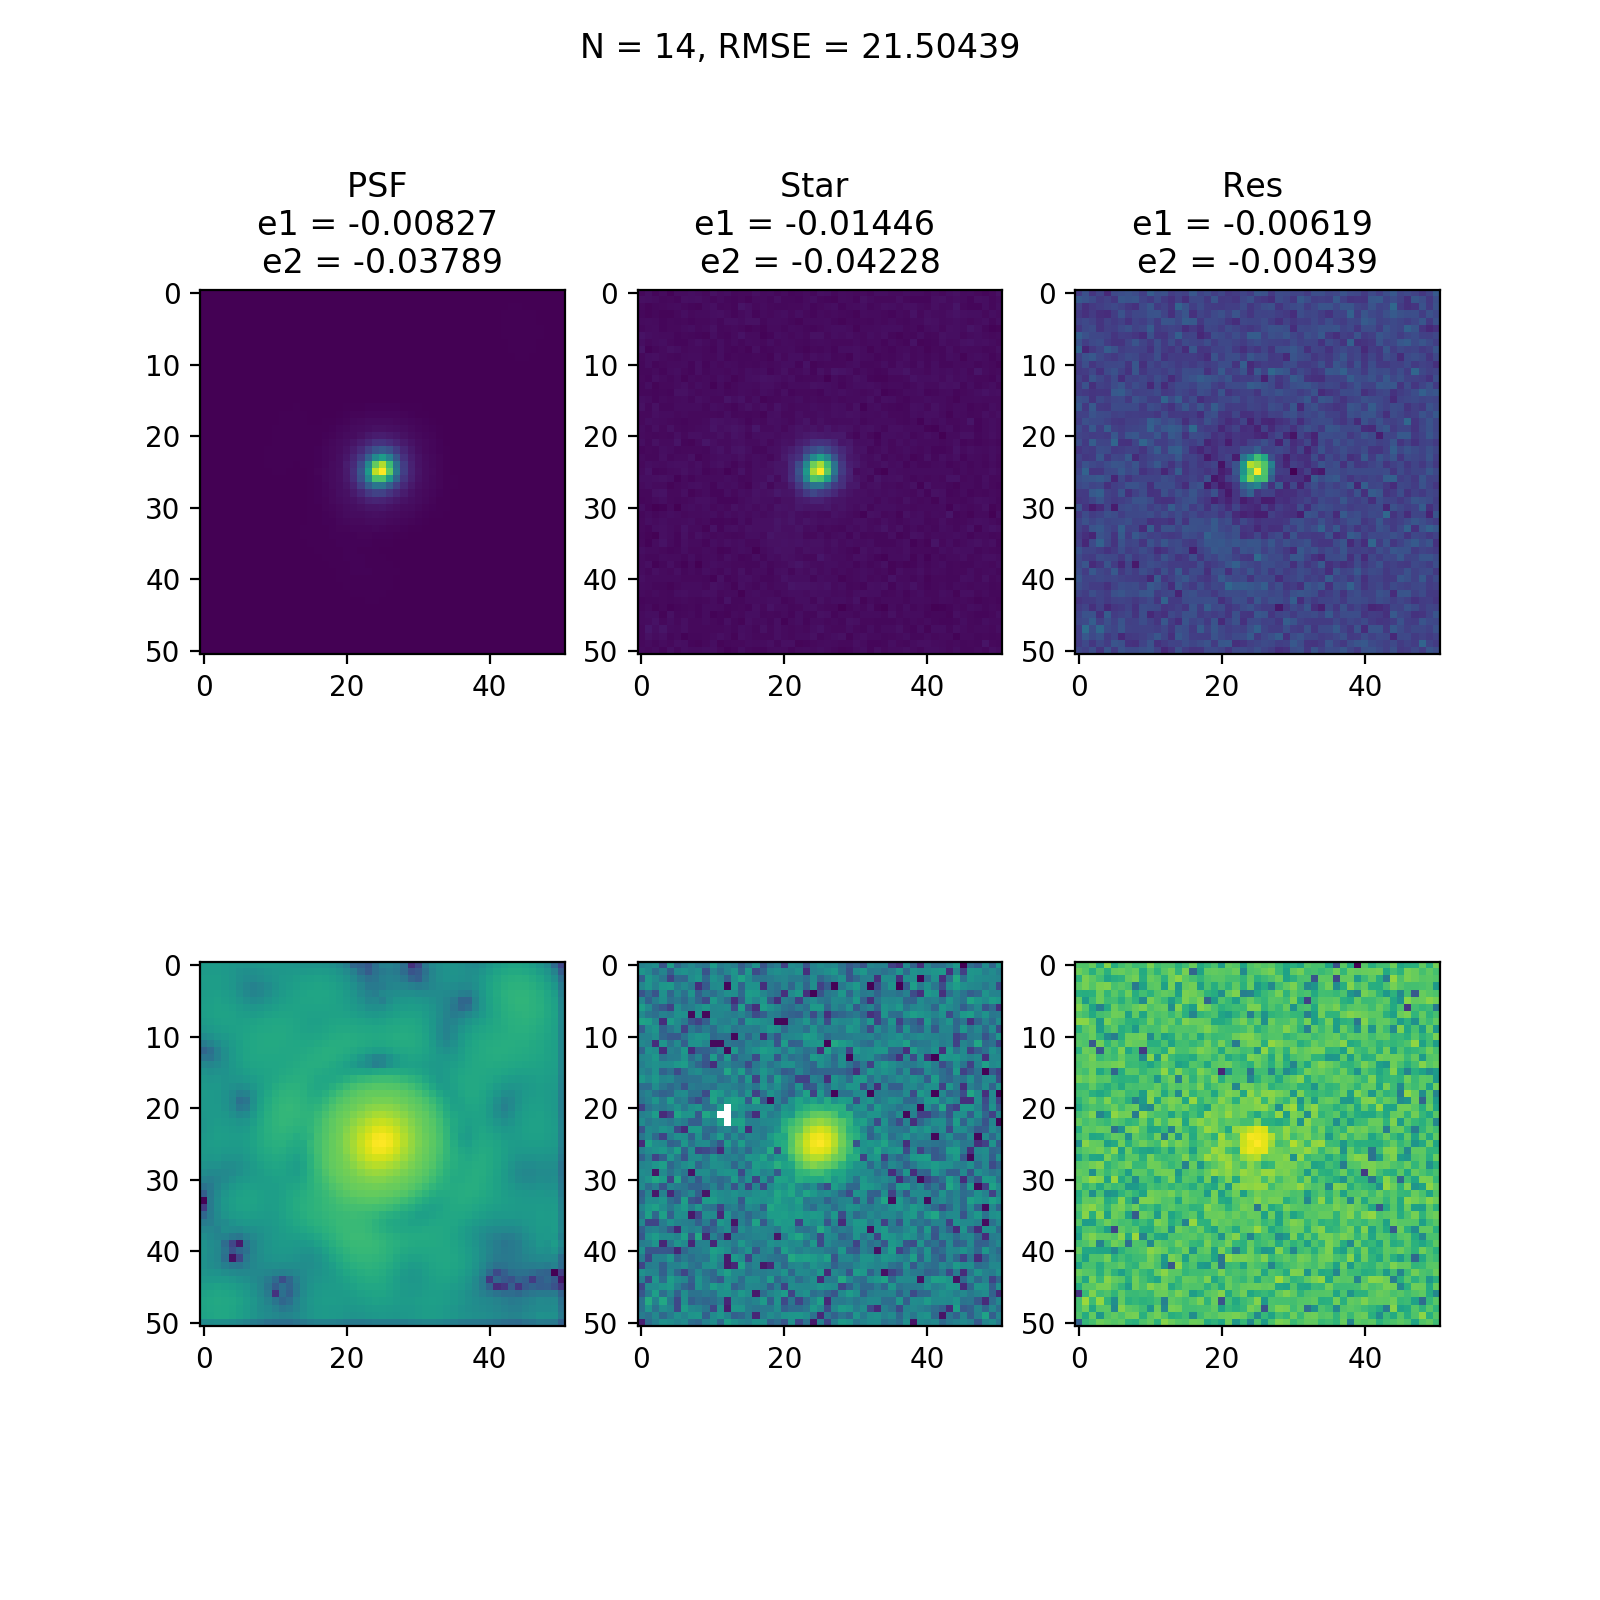

<IPython.core.display.Javascript object>


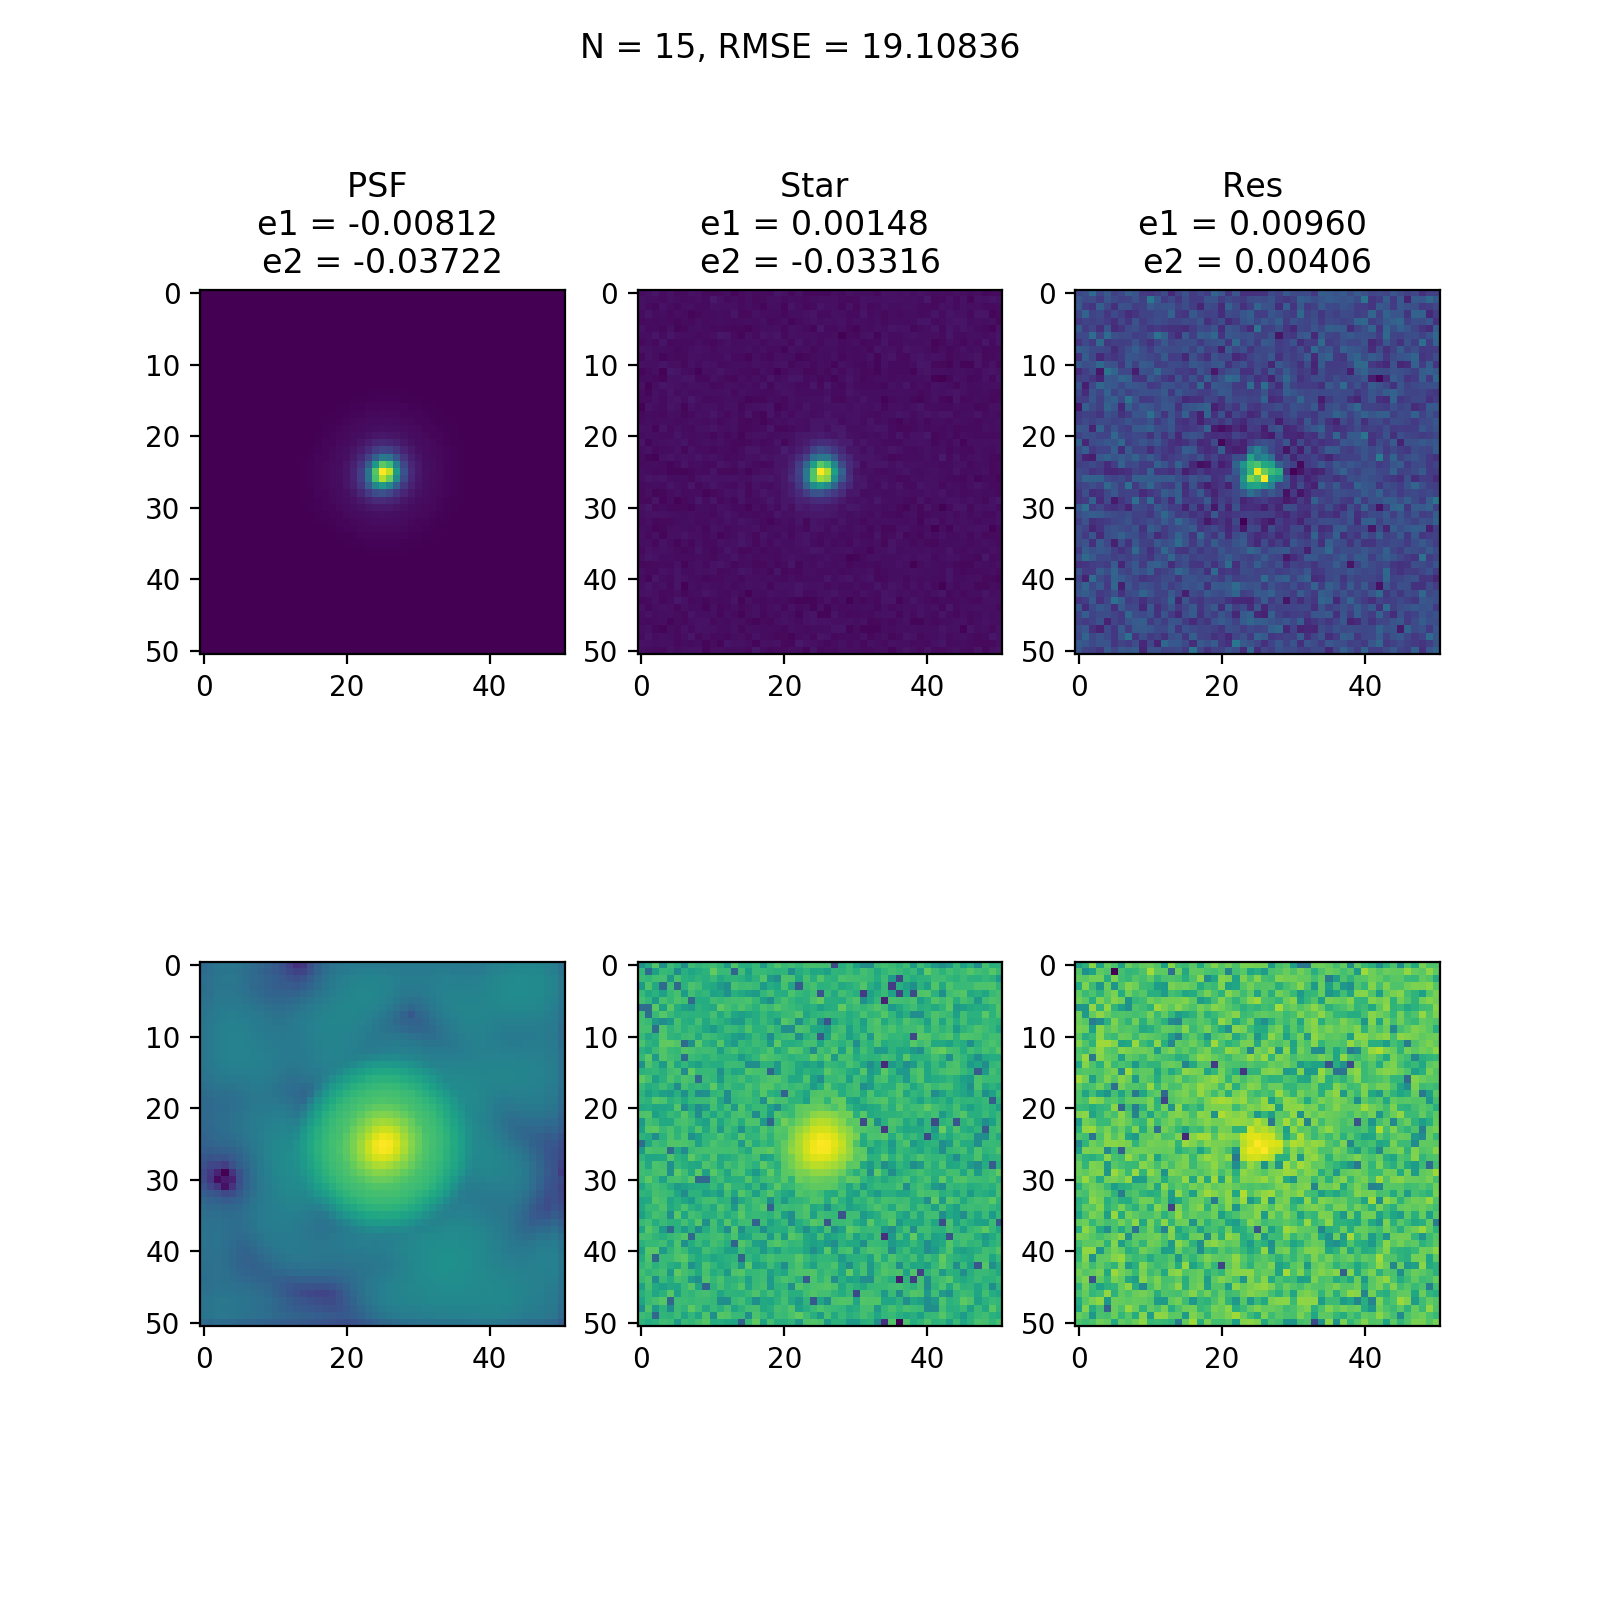

<IPython.core.display.Javascript object>


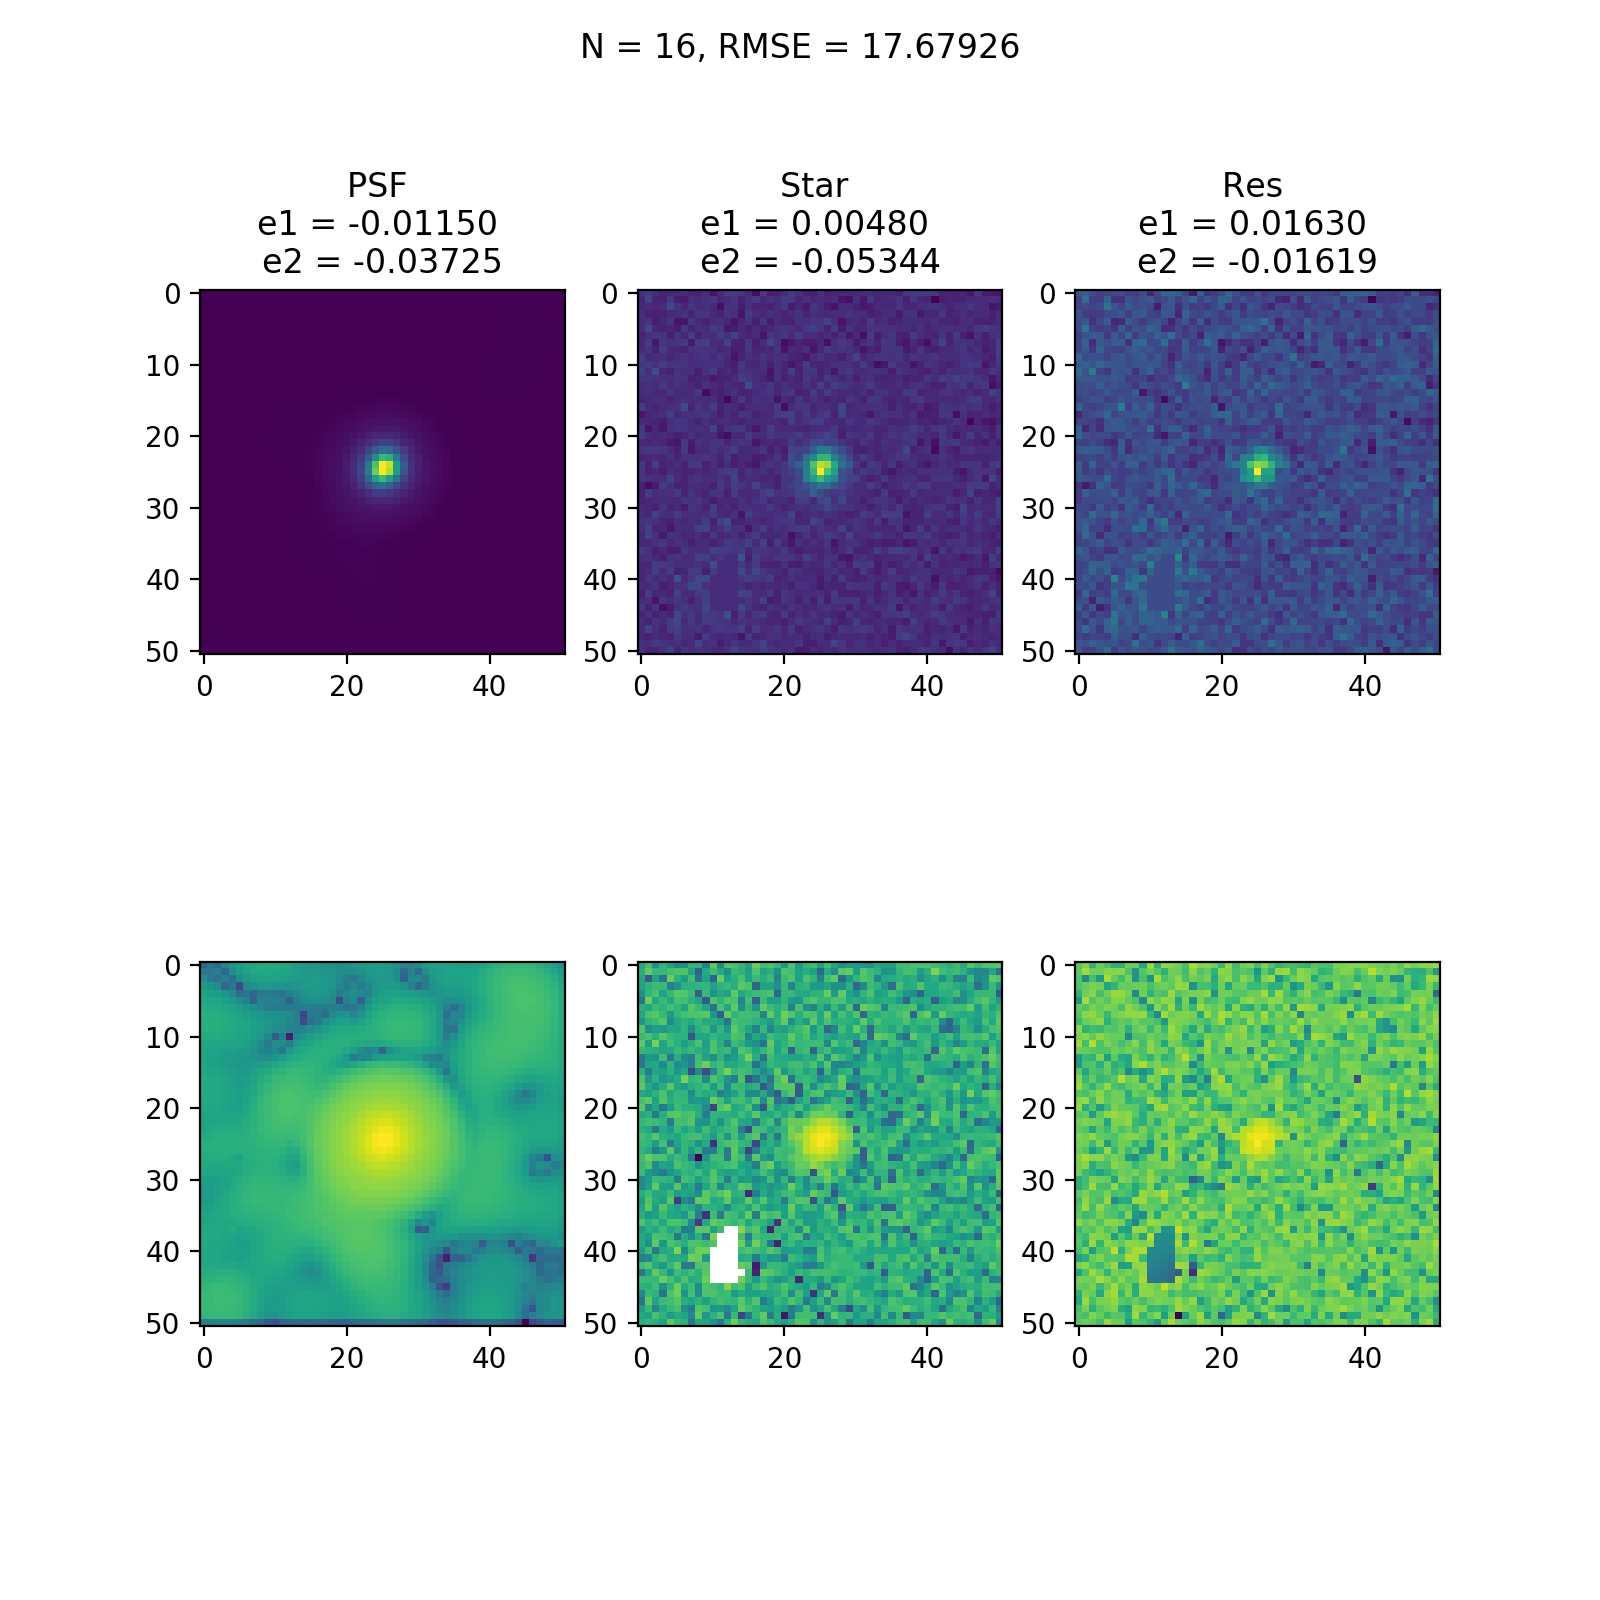

<IPython.core.display.Javascript object>


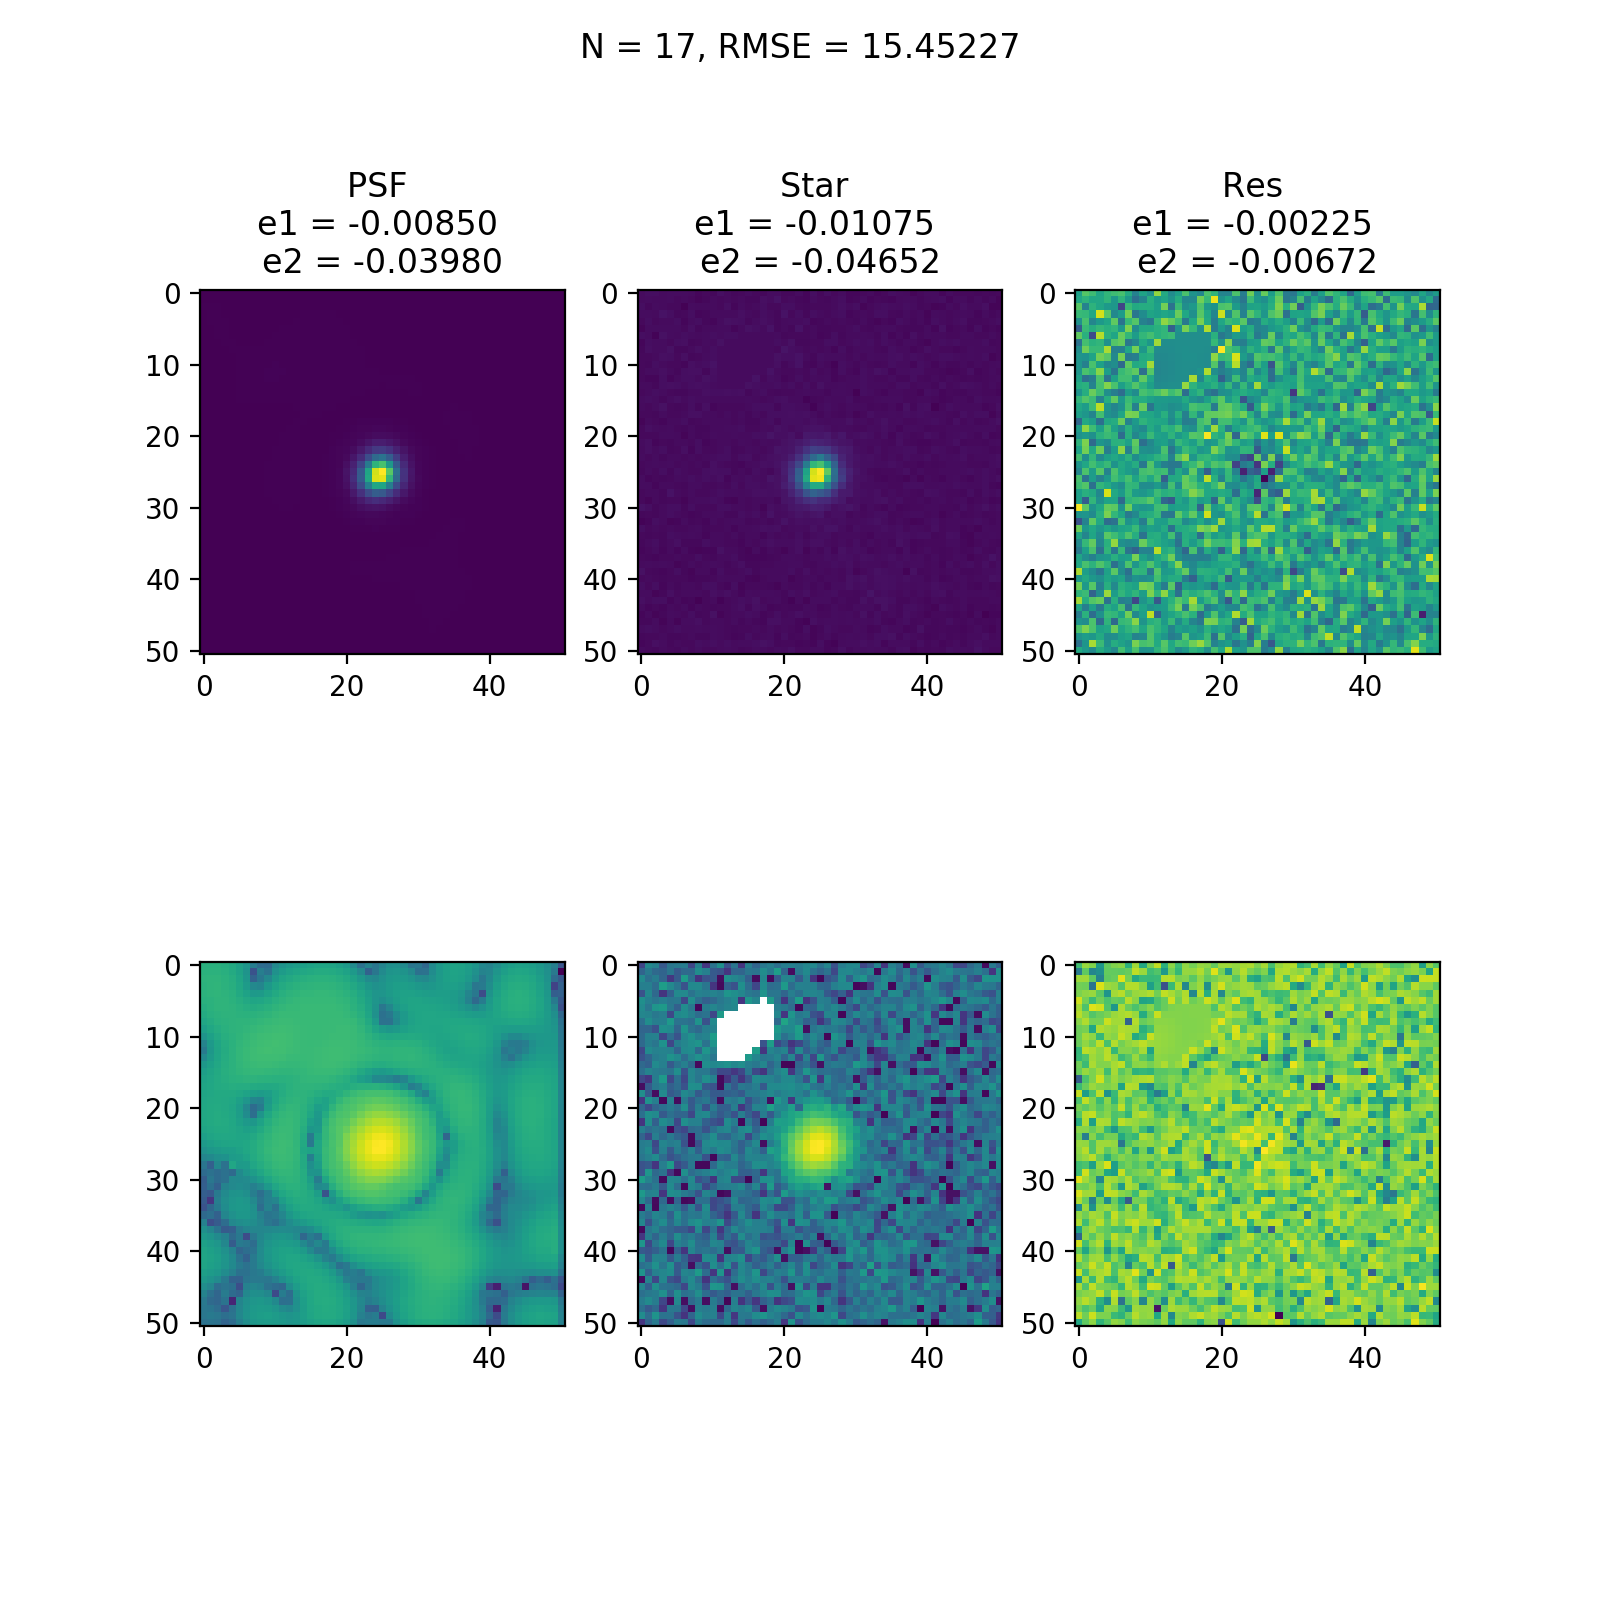

<IPython.core.display.Javascript object>


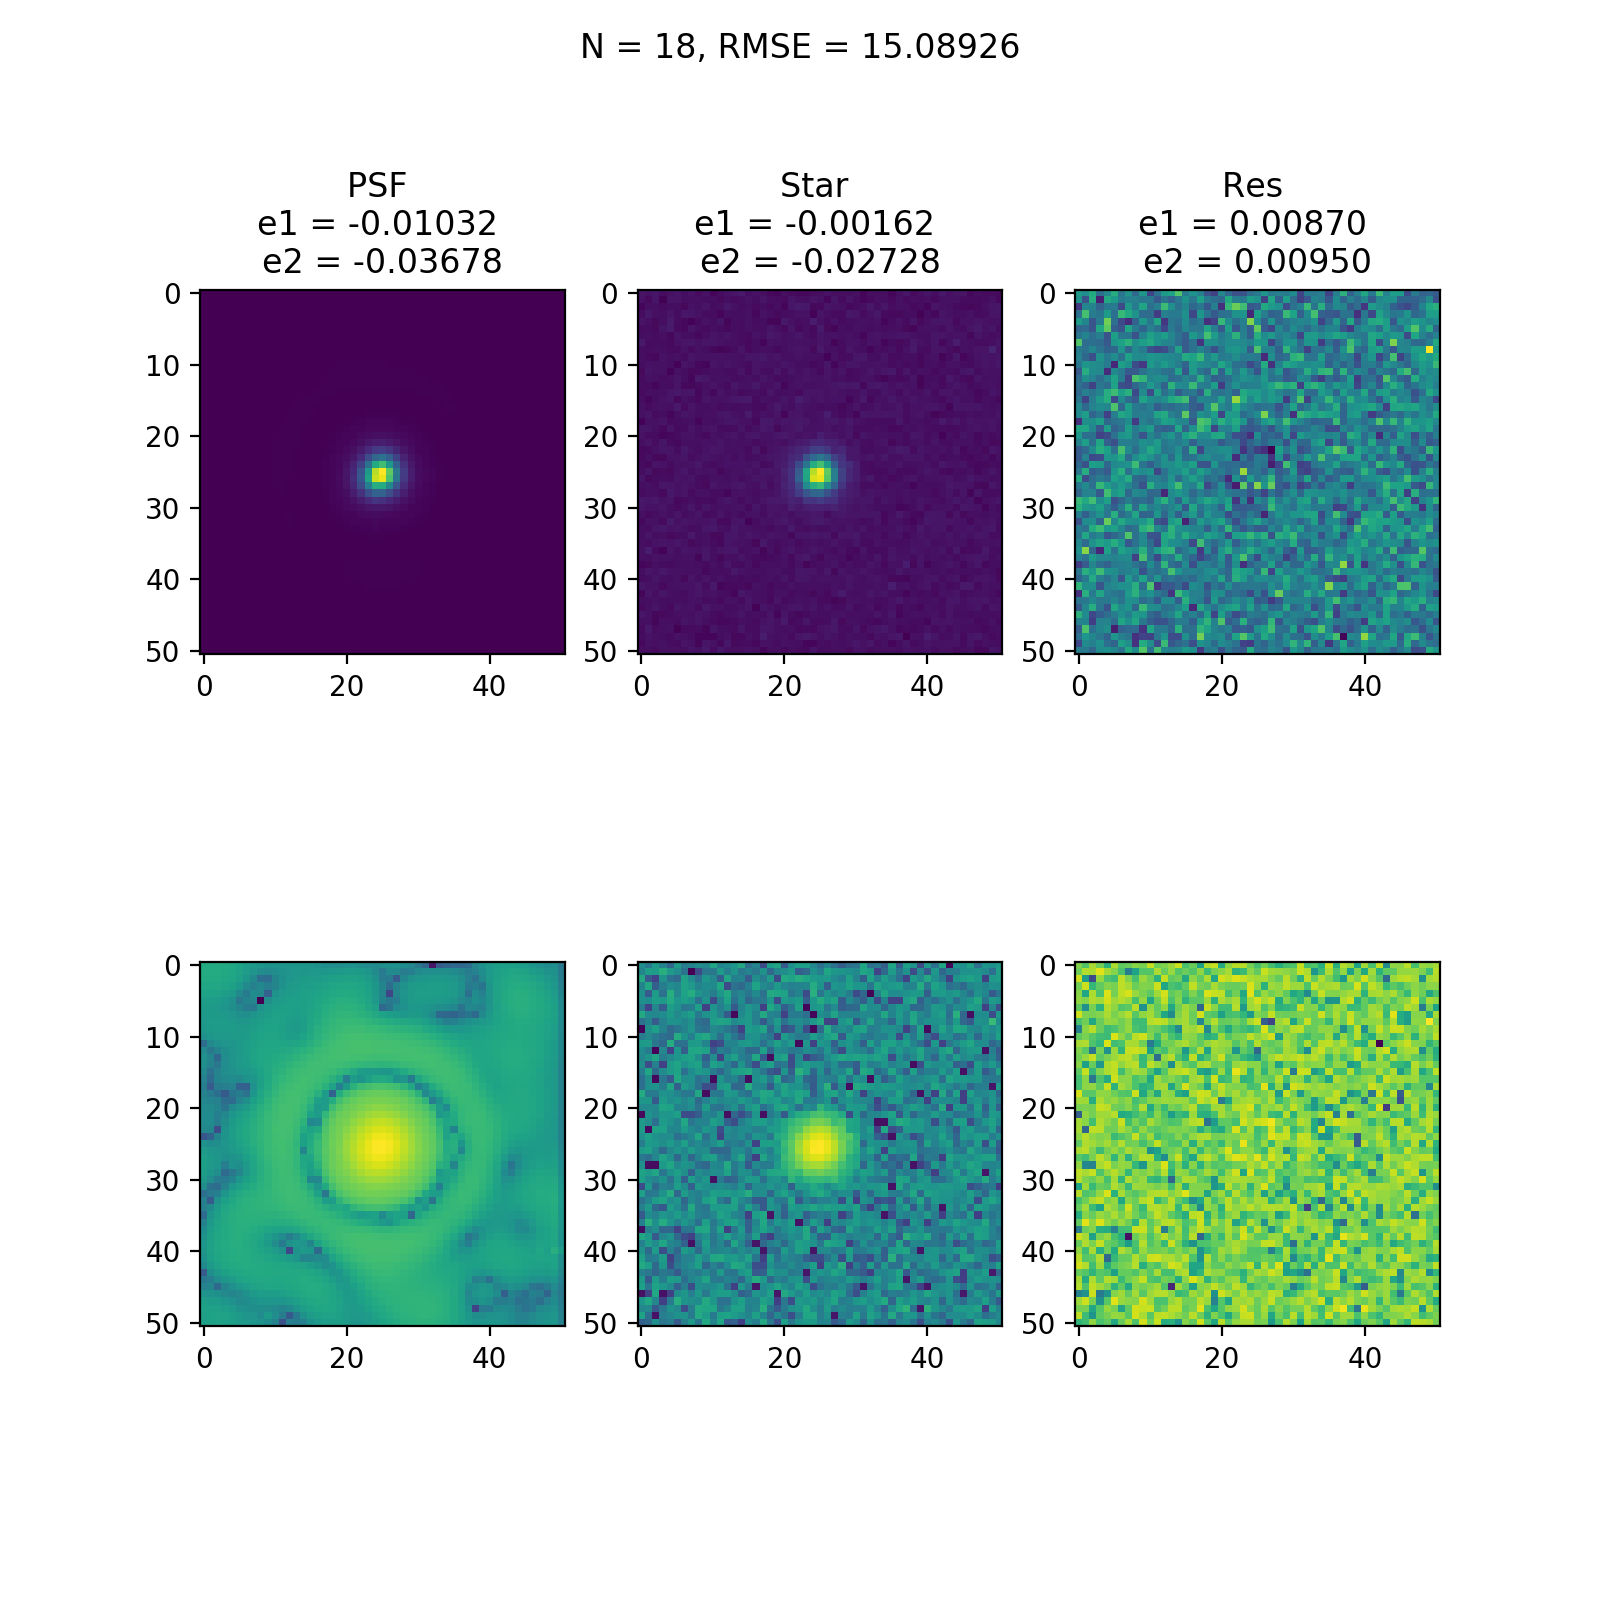

<IPython.core.display.Javascript object>


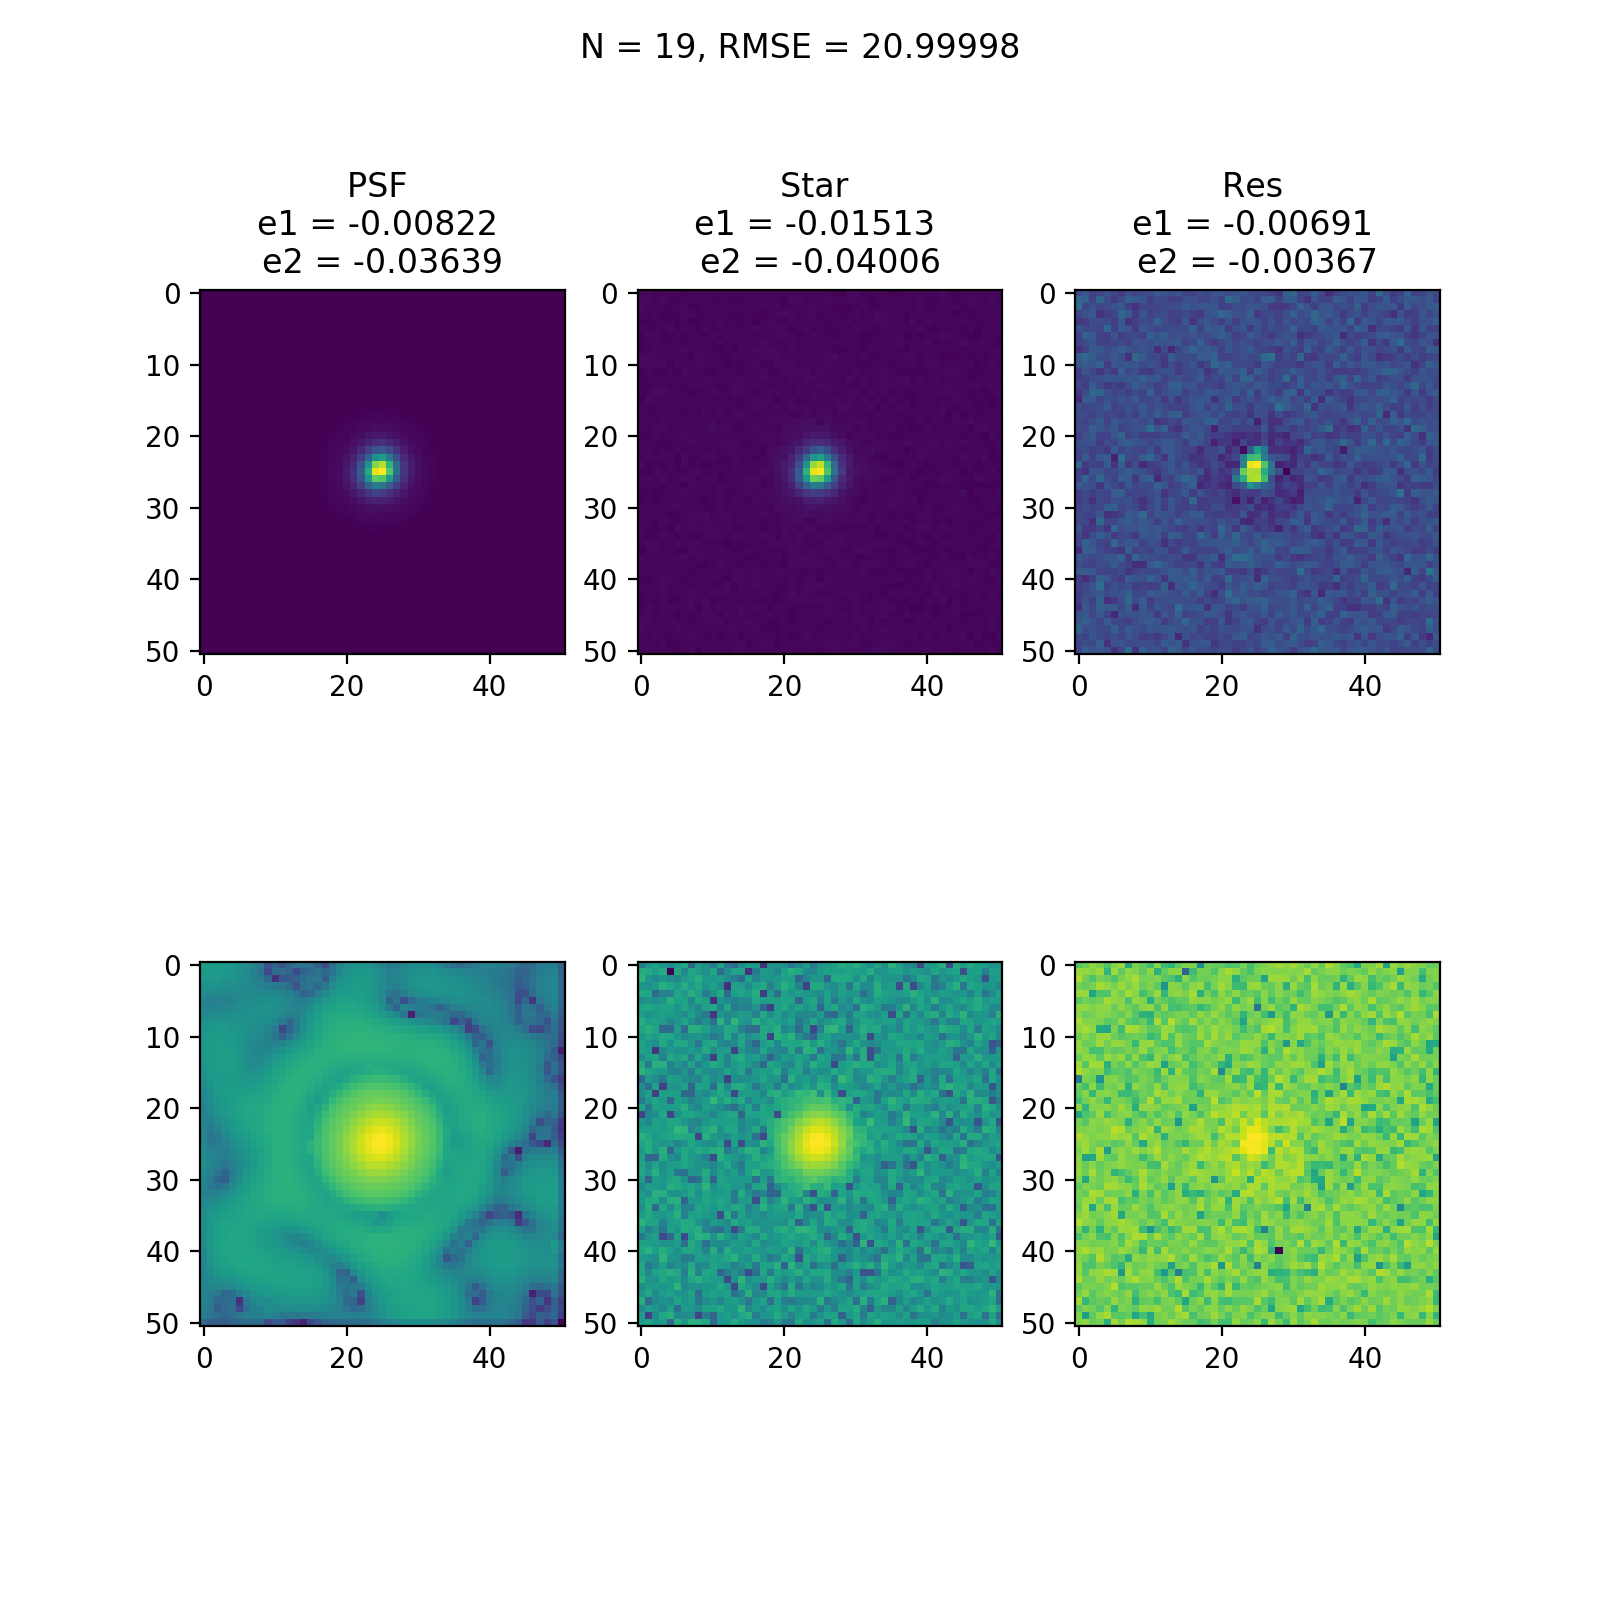

In [60]:
n_max = 20

max_im = PSF.shape[0] if PSF.shape[0] < n_max else n_max

for i in range(max_im):
    err = star[i,:,:] - PSF[i,:,:]
    RMSE = np.sqrt(np.sum(err**2)/(star.shape[1]*star.shape[2]))
    fig, axs = plt.subplots(2, 3, figsize=(8,8))
    fig.suptitle('N = %d, RMSE = %.5f\n'%(i,RMSE))
    im = axs[0,0].imshow(PSF[i,:,:])
    axs[0,0].set_title('PSF \ne1 = %.5f \ne2 = %.5f' %(PSF_shapes[i,0],PSF_shapes[i,1]))
    axs[0,1].imshow(star[i,:,:])
    axs[0,1].set_title('Star \ne1 = %.5f \ne2 = %.5f' %(star_shapes[i,0],star_shapes[i,1]))
    axs[0,2].imshow(err)
    axs[0,2].set_title('Res \ne1 = %.5f \ne2 = %.5f' %(star_shapes[i,0]-PSF_shapes[i,0],star_shapes[i,1]-PSF_shapes[i,1]))
    
    axs[1,0].imshow(np.log(abs(PSF[i,:,:])))
    axs[1,1].imshow(np.log(abs(star[i,:,:])))
    axs[1,2].imshow(np.log(abs(err)))
    #plt.colorbar(im, ax = axs[0,0])
    
    